## **CAPSTONE PROJECT 3: E-commerce Customer Churn**

### **Business Problem Understanding**


**Context**

Sebuah perusahaan retail online (E-commerce) terkemuka ingin meningkatkan jumlah customer dan aktivitas transaksi di platform mereka. Berdasarkan data, sekitar 17% customer terindikasi telah churn (berhenti menggunakan layanan). Churn ini merupakan tantangan besar yang dapat menghambat pertumbuhan perusahaan. Oleh karena itu, sangat penting bagi perusahaan untuk mengetahui faktor-faktor utama penyebab churn serta menemukan cara yang efektif untuk mempertahankan customer.

Perusahaan telah mengumpulkan data customer, yang mencakup informasi pribadi serta aktivitas mereka di platform, termasuk status churn mereka.

Indikasi churn pada data:

- 0: Customer yang tidak churn.
- 1: Customer yang churn.

**Problem Statement**

Perusahaan berencana mengembangkan strategi retensi yang lebih efektif untuk mencegah customer berhenti menggunakan layanan mereka. Strategi ini, seperti pemberian diskon atau promo khusus, memerlukan alokasi biaya yang signifikan. Oleh karena itu, penting untuk memastikan bahwa tindakan retensi ini tepat sasaran dan hanya diberikan kepada customer yang benar-benar berisiko churn.

Untuk mencapai hal ini, perusahaan perlu memahami faktor-faktor yang memengaruhi perilaku customer dan prediksi churn berdasarkan data historis agar strategi yang diterapkan lebih efisien dan berdampak.

**Goals**

Tujuan dari proyek analisis ini adalah:
- Mengidentifikasi faktor-faktor utama yang mempengaruhi churn customer.
- Mengembangkan model prediksi churn yang akurat untuk mengidentifikasi customer yang berisiko berhenti menggunakan layanan.
- Menyediakan wawasan untuk membantu perusahaan merancang layanan dan strategi retensi yang lebih baik di masa depan, dengan fokus pada pengurangan churn.
- Mengoptimalkan alokasi biaya promosi dan diskon, sehingga hanya customer yang benar-benar berisiko churn yang menerima tawaran tersebut.

**Analytic Aproach**

Analisis ini akan dimulai dengan eksplorasi data untuk menemukan pola-pola yang membedakan customer yang churn dan yang tidak. Berdasarkan pola tersebut, akan dibangun model Machine Learning untuk mengklasifikasikan customer yang berpotensi churn.

Model klasifikasi ini akan digunakan untuk memprediksi kemungkinan churn setiap customer, yang kemudian dapat membantu perusahaan dalam menargetkan customer berisiko dengan lebih tepat.

**Metric Evaluation**

Akurasi model prediksi churn akan dievaluasi menggunakan beberapa metrik penting:

- Type 1 error (False Positive): customer yang diprediksi churn, tetapi sebenarnya tidak churn. Konsekuensinya adalah perusahaan mengeluarkan biaya untuk promosi atau diskon yang tidak perlu.

- Type 2 error (False Negative): customer yang sebenarnya churn, tetapi tidak terdeteksi oleh model. Konsekuensinya, perusahaan kehilangan kesempatan untuk mempertahankan customer tersebut.

Metrik Evaluasi:

- Precision: Mengukur seberapa akurat model dalam memprediksi churn, yaitu dari seluruh prediksi churn, seberapa banyak yang benar-benar churn. (Meminimalkan False Positives)
- Recall: Mengukur kemampuan model dalam mendeteksi semua customer yang benar-benar churn (Meminimalkan False Negatives).
- F1-Score: Rata-rata harmonis dari precision dan recall, yang memberikan keseimbangan antara keduanya.
- ROC-AUC: Mengukur Trade-off antara True Positive Rate dan False Positive Rate serta berfokus mengukur kemampuan pemisahan umum kelas churn dan tidak churn

Pada kasus churn analysis ini, dengan asumsi bahwa margin profit dan CLV perusahaan cukup tinggi, Recall menjadi metrik yang paling penting. Dengan memprioritaskan Recall, perusahaan dapat memaksimalkan jumlah customer yang berpotensi churn yang dapat ditangkap dan ditawarkan promo.

Keputusan ini logis karena:
- CLV yang tinggi: Setiap customer yang dapat dipertahankan memiliki nilai yang besar bagi perusahaan, sehingga biaya promosi tambahan untuk beberapa false positives (customer yang sebenarnya tidak churn tapi diprediksi churn) lebih kecil dibandingkan potensi keuntungan dari customer yang berhasil dipertahankan.
- False positives yang dapat ditoleransi: Meskipun akan ada customer yang sebenarnya tidak berisiko churn namun menerima promosi, biaya tersebut dianggap wajar jika dibandingkan dengan potensi kerugian dari kehilangan customer yang seharusnya bisa dicegah churn-nya.
Dalam skenario ini, perusahaan lebih baik memaksimalkan Recall meskipun precision menurun, karena penekanan utamanya adalah pada jumlah customer yang bisa diselamatkan.

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### **Data Understanding & Data Cleaning**

Dataset dapat diakses [disini](https://drive.google.com/drive/folders/1KElsK-I03XA8LC9TS4gr5sbmieasX3uP?usp=sharing)

In [2]:
# Load Dataset
df = pd.read_csv("data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Sebelum dimulai tahapan selanjutnya, akan dilihat terlebih dahulu informasi dari data set yang didapatkan.

Dataset ini berisi data customer dari sebuah perusahaan retail online (E-commerce). Dalam kumpulan data tersebut, setiap baris mewakili setiap customer yang pernah bertransaksi pada perusahaan tersebut, dan kolom-kolomnya meliputi beberapa fitur:

**Features**
-	Tenure: Lama waktu pelanggan berlangganan di perusahaan.
-	WarehouseToHome: Jarak antara gudang ke rumah pelanggan.
-	NumberOfDeviceRegistered: Total jumlah perangkat/devices yang terdaftar pada pelanggan tertentu.
-	PreferedOrderCat: Kategori pesanan yang paling sering dipesan oleh pelanggan dalam sebulan terakhir.
-	SatisfactionScore: Skor kepuasan pelanggan terhadap layanan.
-	MaritalStatus: Status pernikahan pelanggan.
-	NumberOfAddress: Total jumlah alamat yang ditambahkan pada pelanggan tertentu.
-	Complaint: Keluhan yang diajukan dalam sebulan terakhir.
-	DaySinceLastOrder: Hari sejak pesanan terakhir oleh pelanggan.
-	CashbackAmount: Rata-rata cashback dalam sebulan terakhir.
-	Churn: Indikator churn (pelanggan berhenti).

In [3]:
desc=['Lama waktu pelanggan berlangganan di perusahaan.',
      'Jarak antara gudang ke rumah pelanggan.',
    'Total jumlah perangkat/devices yang terdaftar pada pelanggan tertentu.',
    'Kategori pesanan yang paling sering dipesan oleh pelanggan dalam sebulan terakhir.',
    'Skor kepuasan pelanggan terhadap layanan.',
    'Status pernikahan pelanggan.',
    'Total jumlah alamat yang ditambahkan pada pelanggan tertentu.',
    'Keluhan yang diajukan dalam sebulan terakhir.',
    'Hari sejak pesanan terakhir oleh pelanggan.',
    'Rata-rata cashback dalam sebulan terakhir.',
    'Indikator churn (pelanggan berhenti)']

In [4]:
pd.set_option('display.max_colwidth',1)

# Jumlah Data(index dan kolom)
print(df.info())

# Data Unik pada setiap Kolom
list_item=[]
for col in df.columns:
    list_item.append([col, df[col].dtypes, df[col].nunique(), df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2), df[col].unique()[0:5]])

tabel_col_unique = pd.DataFrame(data=list_item, columns=['Feature / Column Name','Data Type','Number of Unique','null','null Percentage','List Unique Sample'])
tabel_col_unique['Description']=desc
tabel_col_unique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB
None


,Feature / Column Name,Data Type,Number of Unique,null,null Percentage,List Unique Sample,Description
0,Tenure,float64,36,194,4.92,"[15.0, 7.0, 27.0, 20.0, 30.0]",Lama waktu pelanggan berlangganan di perusahaan.
1,WarehouseToHome,float64,33,169,4.29,"[29.0, 25.0, 13.0, 15.0, 16.0]",Jarak antara gudang ke rumah pelanggan.
2,NumberOfDeviceRegistered,int64,6,0,0.00,"[4, 3, 6, 2, 5]",Total jumlah perangkat/devices yang terdaftar pada pelanggan tertentu.
3,PreferedOrderCat,object,6,0,0.00,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone]",Kategori pesanan yang paling sering dipesan oleh pelanggan dalam sebulan terakhir.
4,SatisfactionScore,int64,5,0,0.00,"[3, 1, 4, 2, 5]",Skor kepuasan pelanggan terhadap layanan.
5,MaritalStatus,object,3,0,0.00,"[Single, Married, Divorced]",Status pernikahan pelanggan.
6,NumberOfAddress,int64,14,0,0.00,"[2, 5, 7, 8, 3]",Total jumlah alamat yang ditambahkan pada pelanggan tertentu.
7,Complain,int64,2,0,0.00,"[0, 1]",Keluhan yang diajukan dalam sebulan terakhir.
8,DaySinceLastOrder,float64,22,213,5.40,"[7.0, nan, 8.0, 11.0, 2.0]",Hari sejak pesanan terakhir oleh pelanggan.
9,CashbackAmount,float64,2335,0,0.00,"[143.32, 129.29, 168.54, 230.27, 322.17]",Rata-rata cashback dalam sebulan terakhir.


In [5]:
print('Persentase Customer Churn (1) dan yang tidak Churn (0):')
print(f'Churn (1): {df['Churn'].value_counts(normalize=True)[1]*100:.2f} %')
print(f'Tidak Churn (0): {df['Churn'].value_counts(normalize=True)[0]*100:.2f} %')

Persentase Customer Churn (1) dan yang tidak Churn (0):
Churn (1): 17.10 %
Tidak Churn (0): 82.90 %


Dari tabel diatas, didapatkan bahwa:
- Setiap baris merepresentasikan data customer yang pernah bertransaksi di platform e-commerce
- Dataset imbalance (tidak seimbang) dimana indikasi customer churn hanya ada sekitar 17% dan customer tidak churn ada sebesar 83%
- Terdapat beberapa fitur yang mempunyai data kosong yaitu pada *Tenure*, *WarehouseToHome* dan *DaySinceLastOrder*
- Sebagian besar fitur bersifat numerik, namun masih terdapat fitur dengan tipe object atau text yaitu *PreferedOrderCat* dan *MaritalStatus* yang nantinya harus dilakukan encoding untuk setiap kategorinya.

Sebelum masuk ke dalam analisis data dan pemodelan Machine Learning, data yang diproses harus sudah bersih dan siap dianalisis. Dari proses *data cleaning*, anomali-anomali yang terdapat di dalam dataset akan diketahui dan perlu ditangani dalam tahapan ini. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Dengan informasi dari tabel diatas, akan dilihat terlebih dahulu persebaran missing value dan nilai korelasi antara seluruh fitur

**Matrix Plot**

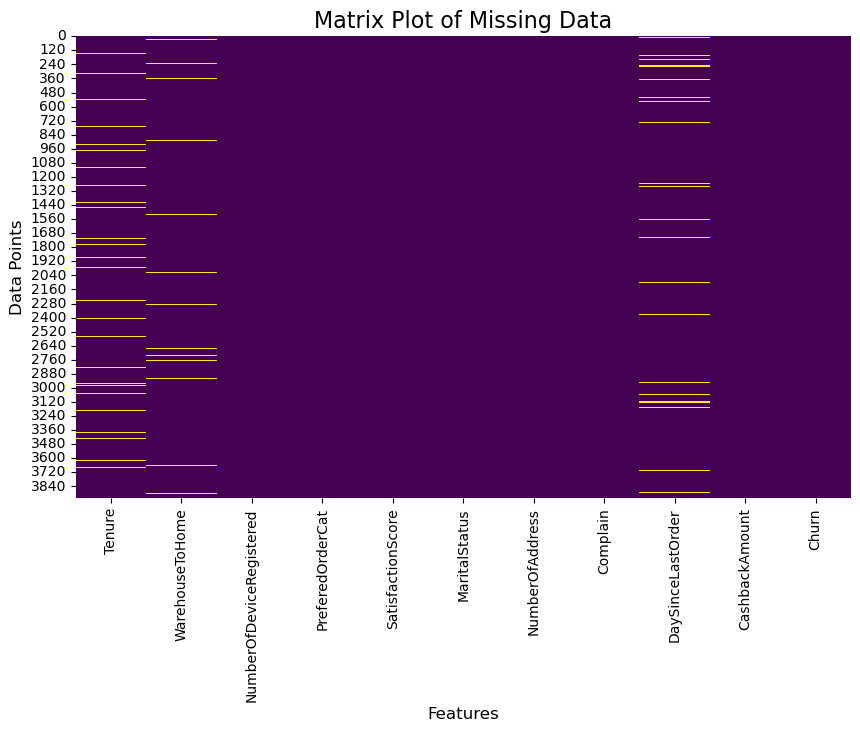

In [6]:
# Membuat plot matrix untuk missing values menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

plt.title('Matrix Plot of Missing Data', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Data Points', fontsize=12)
plt.show()

Terlihat bahwa missing value/data yang hilang pada setiap kolom memiliki pola yang cukup acak.

**Heat Map**

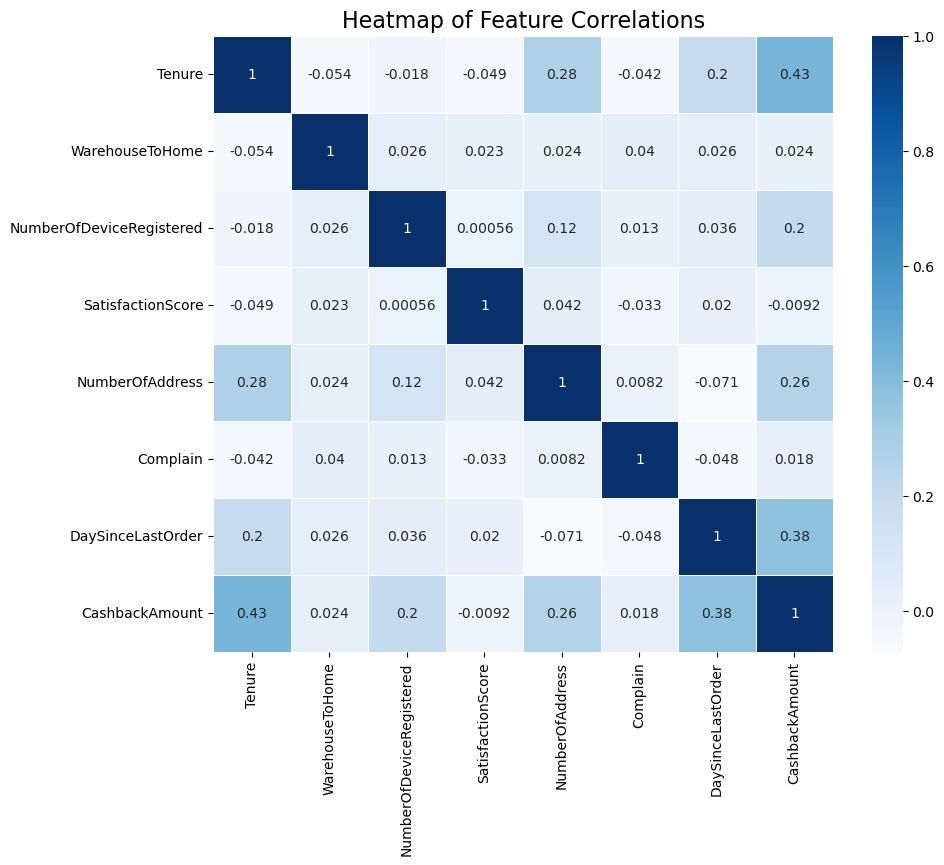

In [7]:
# Menghitung matriks korelasi
correlation_matrix = df.drop(columns=['PreferedOrderCat','MaritalStatus','Churn']).corr(method='spearman')

# Membuat heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)

# Judul untuk heatmap
plt.title('Heatmap of Feature Correlations', fontsize=16)
plt.show()

| Value of Correlation Coeffficient | Relationship Interpretation |
| --- | --- |
| 0.000 - 0.199 | Very Weak |
| 0.200 - 0.399 | Weak |
| 0.400 - 0.599 | Moderate |
| 0.600 - 0.799 | Strong |
| 0.800 - 1.000 | Very Strong |

Terlihat dari heatmap tersebut, antara fitur tidak terdapat korelasi yang kuat dimana tidak ada fitur yang mempunyai nilai korelasi diatas 0.43.

### Penanganan Missing Value

Selanjutnya untuk penanganan data kosong. Pada bagian ini, data kosong dapat ditangani dengan cara berikut:
1. Penghapusan baris/kolom yang mengisi missing value. Cara ini tidak disarankan jika missing value mempunyai jumlah yang tinggi dibandingnya jumlah data yang dimiliki
2. Pengisian data yang hilang. Cara ini lebih disarankan dan ada beberapa metode untuk mengisi missing value tersebut. Cara yang terbaik adalah dengan mengisi data kosong dengan data yang mendekati dengan data sebenarnya. Dalam kasus ini, data kosong akan akan diisi secara domain knowledge atau secara statistik berdasarkan dengan kolom lainnya. Jika masih ada kolom yang tidak bisa diisi, maka akan diisi dengan angka mean, median, modus atau algoritma lainnya. Menghapus data adalah pilihan terakhir. 

In [8]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered    0  
PreferedOrderCat            0  
SatisfactionScore           0  
MaritalStatus               0  
NumberOfAddress             0  
Complain                    0  
DaySinceLastOrder           213
CashbackAmount              0  
Churn                       0  
dtype: int64

In [9]:
# Pengecekan apakah missing value ada yang beririsan ()

df_missing = df[df['WarehouseToHome'].isna() & df['DaySinceLastOrder'].isna()] + df[df['Tenure'].isna() & df['DaySinceLastOrder'].isna()] +df[df['Tenure'].isna() & df['WarehouseToHome'].isna()]
df_missing

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn


In [10]:
print(f'Total baris yang mempunyai missing value : {df.isna().sum().sum()} dari {len(df)} baris dan persentasenya adalah {df.isna().sum().sum()/len(df)*100:.2f}% dari total data')

Total baris yang mempunyai missing value : 576 dari 3941 baris dan persentasenya adalah 14.62% dari total data


Dikarenakan tidak terdapat missing value pada baris (index) yang sama, maka dapat disimpulkan missing value adalah total missing value dari seluruh kolom / fitur yaitu 14,62% dari total data dan missing value terdapat pada fitur Tenure, WarehouseToHome dan DaySinceLastOrder.

Sebelum dilakukan penghapusan atau pengisian missing value pada kolom tersebut, dapat dilihat terlebih dahulu distribusi data sebenarnya agar setelah dilakukan penanganan missing value, distribusi data tidak akan berubah signifikan.

In [11]:
display(df.describe()[['Tenure','WarehouseToHome','DaySinceLastOrder']])

,Tenure,WarehouseToHome,DaySinceLastOrder
count,3747.000000,3772.000000,3728.000000
mean,10.081398,15.650583,4.531652
std,8.498864,8.452301,3.667648
min,0.000000,5.000000,0.000000
25%,2.000000,9.000000,2.000000
50%,9.000000,14.000000,3.000000
75%,16.000000,21.000000,7.000000
max,61.000000,127.000000,46.000000


### Untuk Fitur Tenure

In [12]:
print(f'Total baris yang mempunyai missing value : {df.isna().sum()['Tenure']} dari {len(df)} baris dan persentasenya adalah {df.isna().sum()['Tenure']/len(df)*100:.2f}% dari total data')

Total baris yang mempunyai missing value : 194 dari 3941 baris dan persentasenya adalah 4.92% dari total data


Fitur ini memiliki 4,92% data kosong dan akan dilakukan pengisian data sesuai dengan hubungannya dengan pada kolom data lainnya.

Dilihat dari nilai korelasi, fitur Tenure mempunyai nilai korelasi paling tinggi dengan fitur CashbackAmount yaitu 0.43. Maka akan dicoba dilihat kembali hubungan antara kedua fitur ini:

In [13]:
df_tenure = df[['Tenure','CashbackAmount']].groupby(by='Tenure').mean().rename(columns={'CashbackAmount':'CashbackAmount (Average)'})
df_tenure['CashbackAmount (Median)'] = df[['Tenure','CashbackAmount']].groupby(by='Tenure').median()

df_tenure.head(10)

,CashbackAmount (Average),CashbackAmount (Median)
Tenure,,
0.0,143.644121,135.780
1.0,162.122761,153.750
2.0,156.358718,152.060
3.0,167.603897,162.725
4.0,169.472781,163.330
5.0,170.461862,161.620
6.0,167.735075,159.330
7.0,164.103311,159.570
8.0,169.590677,165.365


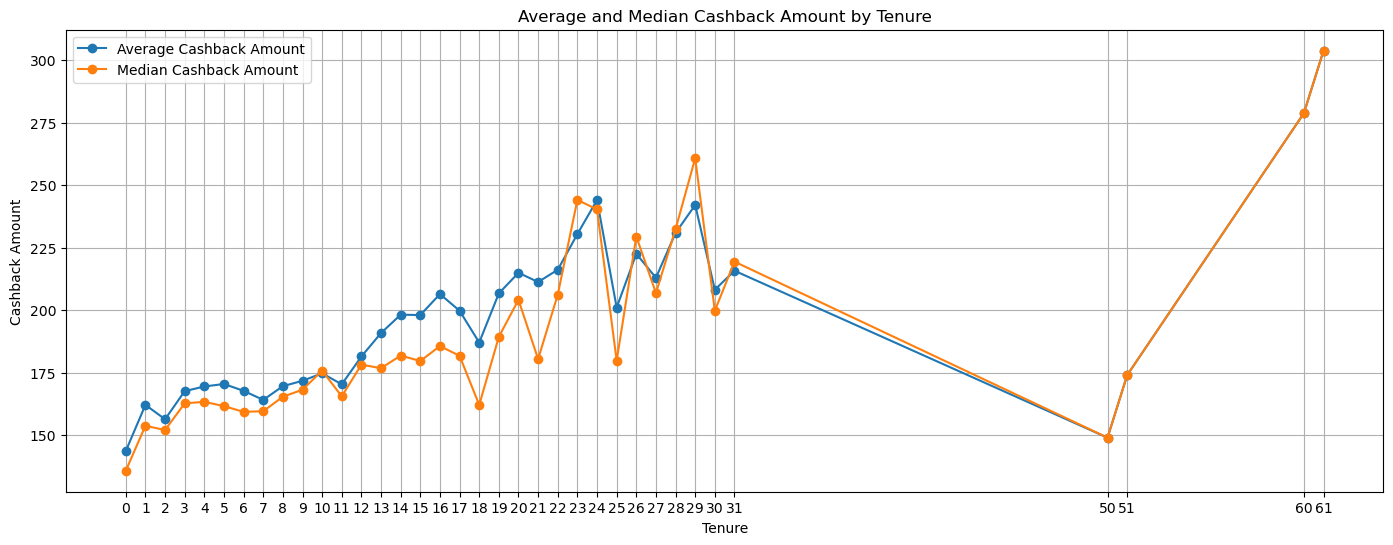

In [14]:
# Membuat line plot
plt.figure(figsize=(17, 6))
plt.plot(df_tenure.index, df_tenure['CashbackAmount (Average)'], label='Average Cashback Amount', marker='o')
plt.plot(df_tenure.index, df_tenure['CashbackAmount (Median)'], label='Median Cashback Amount', marker='o')

# Menambahkan label dan judul
plt.title('Average and Median Cashback Amount by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Cashback Amount')
plt.xticks(df_tenure.index)  # Menampilkan semua nilai Tenure sebagai ticks
plt.legend()
plt.grid()
plt.show()

Secara umum, dapat dilihat dengan kenaikan Tenure, maka CashbackAmount juga akan meningkat walaupun nilai korelasi hanya moderat. 

Maka untuk fitur Tenure, pengisian missing value akan dilakukan dengan metode Iterative Imputer dengan fitur CashbackAmount.

### Untuk Fitur WarehouseToHome

In [15]:
print(f'Total baris yang mempunyai missing value : {df.isna().sum()['WarehouseToHome']} dari {len(df)} baris dan persentasenya adalah {df.isna().sum()['WarehouseToHome']/len(df)*100:.2f}% dari total data')

Total baris yang mempunyai missing value : 169 dari 3941 baris dan persentasenya adalah 4.29% dari total data


Dari keseluruhan hubungan korelasi fitur lainnya dengan fitur WarehouseToHome, semua nilai sangat kecil yaitu dibawah 0.1. Maka untuk missing value pada fitur ini akan diisi dengan metode simple imputer dengan nilai median nya (menghindari outlier).

### Untuk Fitur DaySinceLastOrder

In [16]:
print(f'Total baris yang mempunyai missing value : {df.isna().sum()['DaySinceLastOrder']} dari {len(df)} baris dan persentasenya adalah {df.isna().sum()['DaySinceLastOrder']/len(df)*100:.2f}% dari total data')

Total baris yang mempunyai missing value : 213 dari 3941 baris dan persentasenya adalah 5.40% dari total data


Fitur ini memiliki 5,40% data kosong dan akan dilakukan pengisian data sesuai dengan hubungannya dengan pada kolom data lainnya.

Dilihat dari nilai korelasi, fitur DaySinceLastOrder mempunyai nilai korelasi paling tinggi dengan fitur CashbackAmount yaitu 0.38. Maka akan dicoba dilihat kembali hubungan antara kedua fitur ini:

In [17]:
df_dslo = df[['DaySinceLastOrder','CashbackAmount']].groupby(by='DaySinceLastOrder').mean().rename(columns={'CashbackAmount':'CashbackAmount (Average)'})
df_dslo['CashbackAmount (Median)'] = df[['DaySinceLastOrder','CashbackAmount']].groupby(by='DaySinceLastOrder').median()

df_dslo.head(10)

,CashbackAmount (Average),CashbackAmount (Median)
DaySinceLastOrder,,
0.0,150.210928,129.330
1.0,172.502968,153.605
2.0,155.608077,144.020
3.0,166.681361,157.130
4.0,169.593654,161.220
5.0,177.188387,168.450
6.0,184.244815,176.550
7.0,170.622038,155.645
8.0,185.945314,175.650


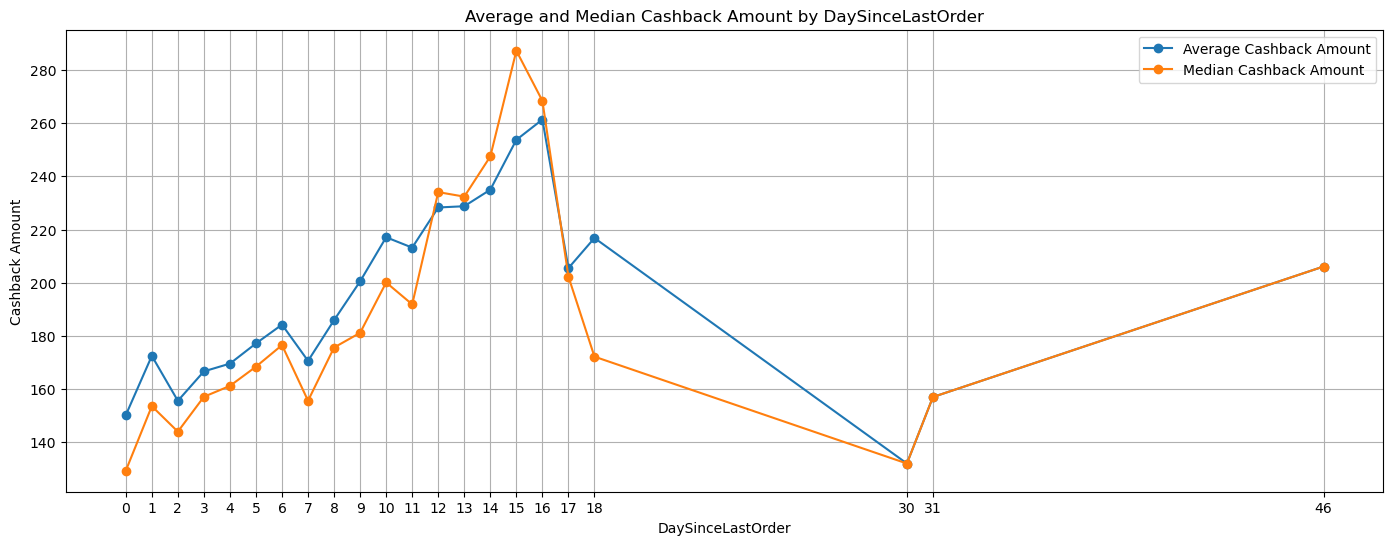

In [18]:
# Membuat line plot
plt.figure(figsize=(17, 6))
plt.plot(df_dslo.index, df_dslo['CashbackAmount (Average)'], label='Average Cashback Amount', marker='o')
plt.plot(df_dslo.index, df_dslo['CashbackAmount (Median)'], label='Median Cashback Amount', marker='o')

# Menambahkan label dan judul
plt.title('Average and Median Cashback Amount by DaySinceLastOrder')
plt.xlabel('DaySinceLastOrder')
plt.ylabel('Cashback Amount')
plt.xticks(df_dslo.index)  # Menampilkan semua nilai Tenure sebagai ticks
plt.legend()
plt.grid()
plt.show()

Sama seperti fitur Tenure, secara umum, dapat dilihat dengan kenaikan DaySinceLastOrder, maka CashbackAmount juga akan meningkat walaupun nilai korelasi hanya moderat. Nilai yang tidak konsisten terjadi setelah nilai DaySinceLastOrder mencapai diatas 16 hari.

Maka untuk fitur DaySinceLastOrder, pengisian missing value akan dilakukan dengan metode Iterative Imputer dengan fitur CashbackAmount.

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

# Subset data yang berisi Tenure dan CashbackAmount
tenure_cashback = df[['Tenure', 'CashbackAmount']]

# Iterative Imputer untuk imputasi Tenure berdasarkan CashbackAmount
iterative_imputer_tenure = IterativeImputer(random_state=0)
tenure_imputed = iterative_imputer_tenure.fit_transform(tenure_cashback)

# Mengisi kembali fitur Tenure yang sudah diimputasi
df['Tenure'] = tenure_imputed[:, 0]

# Subset data yang berisi DaySinceLastOrder dan CashbackAmount
days_cashback = df[['DaySinceLastOrder', 'CashbackAmount']]

# Iterative Imputer untuk imputasi DaySinceLastOrder berdasarkan CashbackAmount
iterative_imputer_days = IterativeImputer(random_state=0)
days_imputed = iterative_imputer_days.fit_transform(days_cashback)

# Mengisi kembali fitur DaySinceLastOrder yang sudah diimputasi
df['DaySinceLastOrder'] = days_imputed[:, 0]

# Simple Imputer untuk 'WarehouseToHome' menggunakan median
simple_imputer = SimpleImputer(strategy='median')
df['WarehouseToHome'] = simple_imputer.fit_transform(df[['WarehouseToHome']])

df

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.000000,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.000000,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.000000,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,5.966042,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.000000,322.17,0
...,...,...,...,...,...,...,...,...,...,...,...
3936,28.0,9.0,5,Fashion,3,Married,8,0,1.000000,231.86,0
3937,8.0,7.0,2,Mobile Phone,2,Single,4,0,4.000000,157.80,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.000000,156.60,0
3939,6.0,14.0,4,Mobile,3,Married,10,1,0.000000,124.37,1


Setelah pengisian data kosong, maka dicek kembali apakah pengisian tersebut membuat distribusi data berubah signifikan.

In [20]:
display(df.describe()[['Tenure','WarehouseToHome','DaySinceLastOrder']])

,Tenure,WarehouseToHome,DaySinceLastOrder
count,3941.000000,3941.000000,3941.000000
mean,9.844239,15.579802,4.596258
std,8.352436,8.275800,3.577576
min,0.000000,5.000000,0.000000
25%,3.000000,9.000000,2.000000
50%,8.000000,14.000000,4.000000
75%,15.000000,20.000000,7.000000
max,61.000000,127.000000,46.000000


### **Data Duplikat**

Tahap selanjutnya adalah pengecekan apakah ada data yang terduplikat di dalam barisnya. Pertama akan dicek untuk data duplikat setiap barisnya:

In [21]:
df.duplicated().value_counts()

False    3270
True     671 
Name: count, dtype: int64

In [22]:
df[df.duplicated]['Churn'].value_counts(normalize=True)

Churn
0    0.791356
1    0.208644
Name: proportion, dtype: float64

Dengan hasil tabel yang menunjukkan data duplikat diatas terdapat sebanyak 671 baris atau 20,1% dari data. 
Adanya data duplikat dapat menghasilkan model yang bias dan kurang akurat. Maka untuk menjaga kualitas data, data duplikat akan dihapus sebelum dilakukan analisis lebih lanjut.

In [23]:
# tes data apakah semua data unique (tidak ada duplikat data row yang sama)

duplicates=df[df.duplicated(keep='first')]
duplicates

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


In [24]:
# Penghapusan data duplikat
df = df.drop_duplicates()

Pengecekan proporsi data churn dan tidak churn setelah pengecekan data duplikat:

In [25]:
print('Persentase Customer Churn (1) dan yang tidak Churn (0):')
print(f'Churn (1): {df['Churn'].value_counts(normalize=True)[1]*100:.2f} %')
print(f'Tidak Churn (0): {df['Churn'].value_counts(normalize=True)[0]*100:.2f} %')

Persentase Customer Churn (1) dan yang tidak Churn (0):
Churn (1): 16.33 %
Tidak Churn (0): 83.67 %


Tidak terdapat perubahan signifikan untuk proporsi indikasi churn setelah penghapusan data duplikat. Sebelumnya adalah 17% churn dan 83% tidak churn. Maka bisa dilanjutkan ke tahap selanjutnya

### **Data Bersih**

Data yang sudah bersih akan dilanjutkan proses analisis. Berikut informasi data sekilas yang sudah dibersihkan:

In [26]:
# Jumlah Data(index dan kolom)
print(df.info())

# Data Unik pada setiap Kolom
list_item=[]
for col in df.columns:
    list_item.append([col, df[col].dtypes, df[col].nunique(),  df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2), df[col].unique()[0:5]])

tabel_col_unique = pd.DataFrame(data=list_item, columns=['Feature / Column Name','Data Type','Number of Unique','null','null Percentage','List Unique Sample'])
tabel_col_unique['Description']=desc
tabel_col_unique

<class 'pandas.core.frame.DataFrame'>
Index: 3270 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3270 non-null   float64
 1   WarehouseToHome           3270 non-null   float64
 2   NumberOfDeviceRegistered  3270 non-null   int64  
 3   PreferedOrderCat          3270 non-null   object 
 4   SatisfactionScore         3270 non-null   int64  
 5   MaritalStatus             3270 non-null   object 
 6   NumberOfAddress           3270 non-null   int64  
 7   Complain                  3270 non-null   int64  
 8   DaySinceLastOrder         3270 non-null   float64
 9   CashbackAmount            3270 non-null   float64
 10  Churn                     3270 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 306.6+ KB
None


,Feature / Column Name,Data Type,Number of Unique,null,null Percentage,List Unique Sample,Description
0,Tenure,float64,148,0,0.0,"[15.0, 7.0, 27.0, 20.0, 30.0]",Lama waktu pelanggan berlangganan di perusahaan.
1,WarehouseToHome,float64,33,0,0.0,"[29.0, 25.0, 13.0, 15.0, 16.0]",Jarak antara gudang ke rumah pelanggan.
2,NumberOfDeviceRegistered,int64,6,0,0.0,"[4, 3, 6, 2, 5]",Total jumlah perangkat/devices yang terdaftar pada pelanggan tertentu.
3,PreferedOrderCat,object,6,0,0.0,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone]",Kategori pesanan yang paling sering dipesan oleh pelanggan dalam sebulan terakhir.
4,SatisfactionScore,int64,5,0,0.0,"[3, 1, 4, 2, 5]",Skor kepuasan pelanggan terhadap layanan.
5,MaritalStatus,object,3,0,0.0,"[Single, Married, Divorced]",Status pernikahan pelanggan.
6,NumberOfAddress,int64,14,0,0.0,"[2, 5, 7, 8, 3]",Total jumlah alamat yang ditambahkan pada pelanggan tertentu.
7,Complain,int64,2,0,0.0,"[0, 1]",Keluhan yang diajukan dalam sebulan terakhir.
8,DaySinceLastOrder,float64,155,0,0.0,"[7.0, 5.966041671483429, 8.0, 11.0, 2.0]",Hari sejak pesanan terakhir oleh pelanggan.
9,CashbackAmount,float64,2335,0,0.0,"[143.32, 129.29, 168.54, 230.27, 322.17]",Rata-rata cashback dalam sebulan terakhir.


Sebelum dibersihkan, data memiliki 3941 baris data. Setelah dibersihkan, data menjadi 3270 baris.

Total baris data yang dihapuskan adalah 207 baris dan data yang kosong sudah diisi dengan data yang dirasa relevan. 

### **Exploratory Data Analysis (EDA)**

### Outlier

Pertama, outlier akan di deteksi dengan cara univariate:

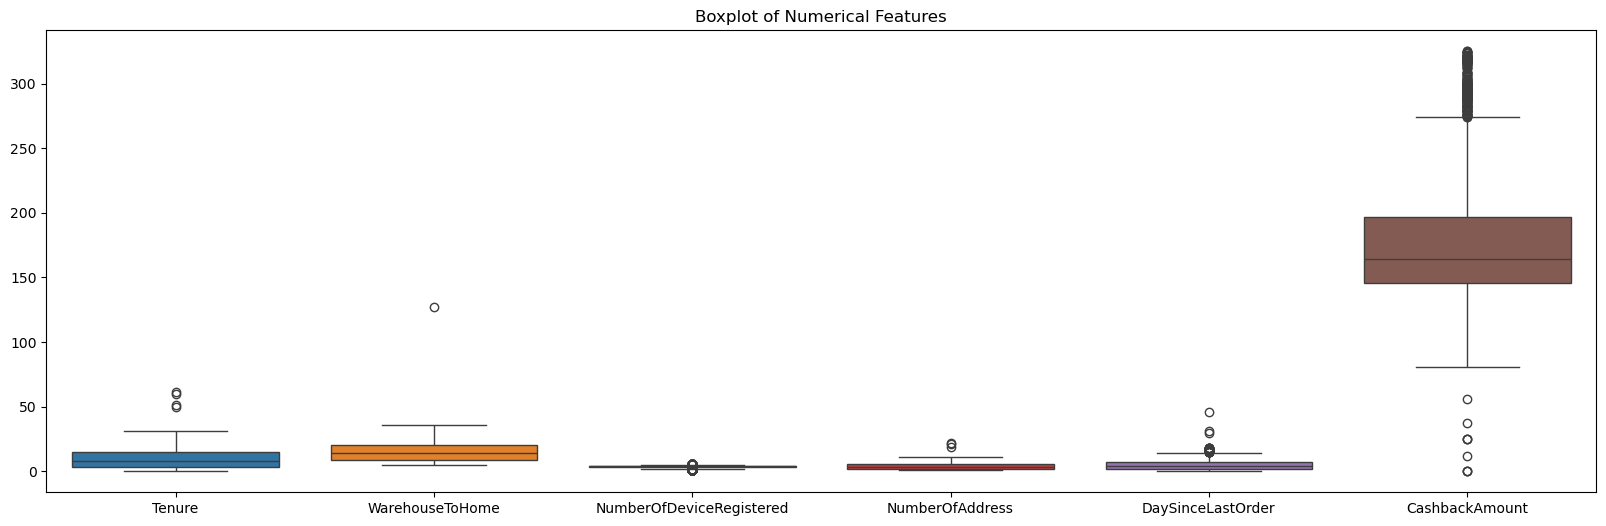

In [27]:
# Boxplot untuk outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=df.drop(columns=['PreferedOrderCat','MaritalStatus','Churn','Complain','SatisfactionScore']))
plt.title('Boxplot of Numerical Features')
plt.show()

In [28]:
numerical = df.drop(columns=['PreferedOrderCat','MaritalStatus','Churn','Complain','SatisfactionScore']).columns

def calculate_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

outlier_data = []

for column in numerical:
    outlier_result, lower_bound, upper_bound = calculate_outliers(df, column)
    total_outlier = len(outlier_result)
    outlier_percentage = round(total_outlier / len(df[column]) * 100, 2)
    outlier_data.append([column, total_outlier, outlier_percentage, lower_bound, upper_bound])

outlier_df = pd.DataFrame(outlier_data, columns=["Column", "Total Outliers", "Percentage (%)", "Lower Bound", "Upper Bound"])
outlier_df


,Column,Total Outliers,Percentage (%),Lower Bound,Upper Bound
0,Tenure,4,0.12,-15.000,33.000
1,WarehouseToHome,1,0.03,-7.500,36.500
2,NumberOfDeviceRegistered,226,6.91,1.500,5.500
3,NumberOfAddress,3,0.09,-4.000,12.000
4,DaySinceLastOrder,40,1.22,-5.500,14.500
5,CashbackAmount,253,7.74,69.025,274.005


In [29]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000
mean,9.949464,15.448012,3.676453,3.020795,4.222936,0.281651,4.610961,177.417670,0.163303
std,8.503207,8.394973,1.017390,1.395113,2.623195,0.449873,3.602630,49.310647,0.369698
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.892500,0.000000
50%,8.000000,14.000000,4.000000,3.000000,3.000000,0.000000,4.000000,163.885000,0.000000
75%,15.000000,20.000000,4.000000,4.000000,6.000000,1.000000,7.000000,197.137500,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


Terlihat bahwa terdapat beberapa data yang termasuk outlier pada setiap fiturnya. Namun, dikarenakan jumlah nya yang banyak, outlier tidak akan dihapuskan dari pembuatan model machine learning.

Pertimbangan tidak membuang outlier adalah dikarenakan beberapa faktor yaitu:
- Outlier tidak disebabkan oleh kesalahan pencatatan atau data yang tidak valid. Terlihat pada boxplot, persebaran outlier masih berkumpul dan tidak ada yang sangat jauh dari yang lainnya. Selain itu, tidak ada angka yang tidak mungkin yaitu angka negatif untuk setiap fiturnya.
- Ada kemungkinan data outlier mencerminkan customer atau transaksi yang valid (misalnya, customer yang sangat aktif atau yang melakukan pembelian besar-besaran), mereka sebaiknya tidak dihapus karena mereka adalah bagian dari data yang relevan.
- Selain model regresi yang sensitif terhadap outlier, model machine learning juga akan dicoba dengan model yang biasanya tidak terlalu terpengaruh terhadap outlier, seperti decision tree, random forest, atau boosting. Dalam kasus ini, outlier tidak harus dihapus.

Selain itu, untuk mengurangi pengaruh outlier, akan digunakan scalling seperti Robust Scaling (berpengaruh untuk regresi logistik) pada setiap fitur numerik yang akan membuat model lebih tahan terhadap outlier.

### Analisis Data (Hubungan Antara Fitur dan Target)

Pertama, dapat dilihat histogram untuk masing-masing fitur numerikal dan barplot untuk fitur text.

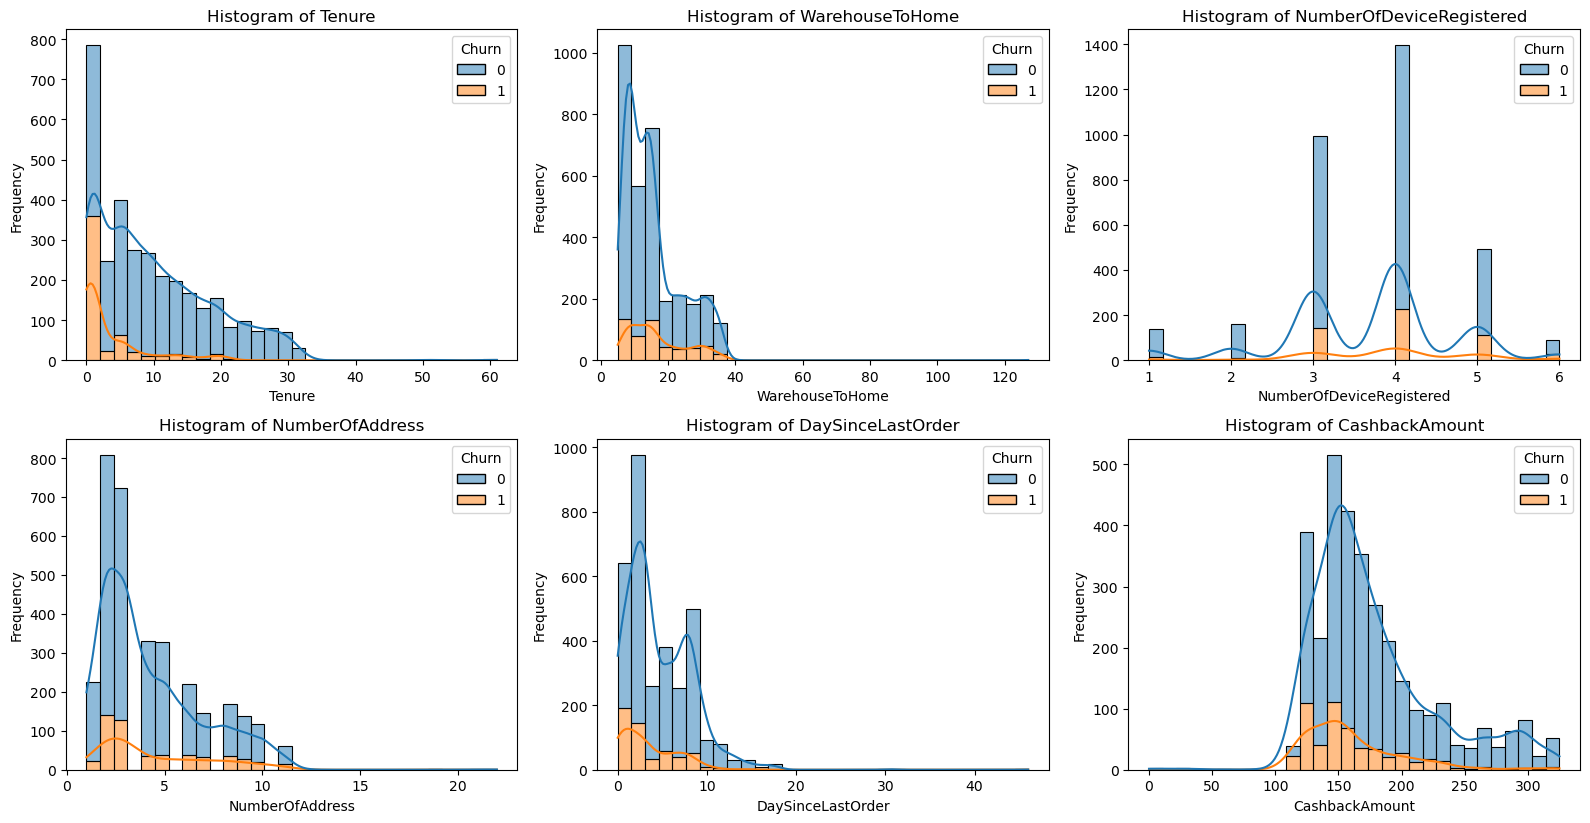

In [30]:
# Mengatur ukuran gambar untuk visualisasi
plt.figure(figsize=(16, 12))

# Membuat histogram untuk setiap fitur numerik
for i, feature in enumerate(numerical, 1):
    plt.subplot(3, 3, i)  # Menyesuaikan grid subplot
    sns.histplot(data=df, x=feature, hue='Churn', multiple='stack', kde=True, bins=30)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()  # Menyesuaikan layout
plt.show()

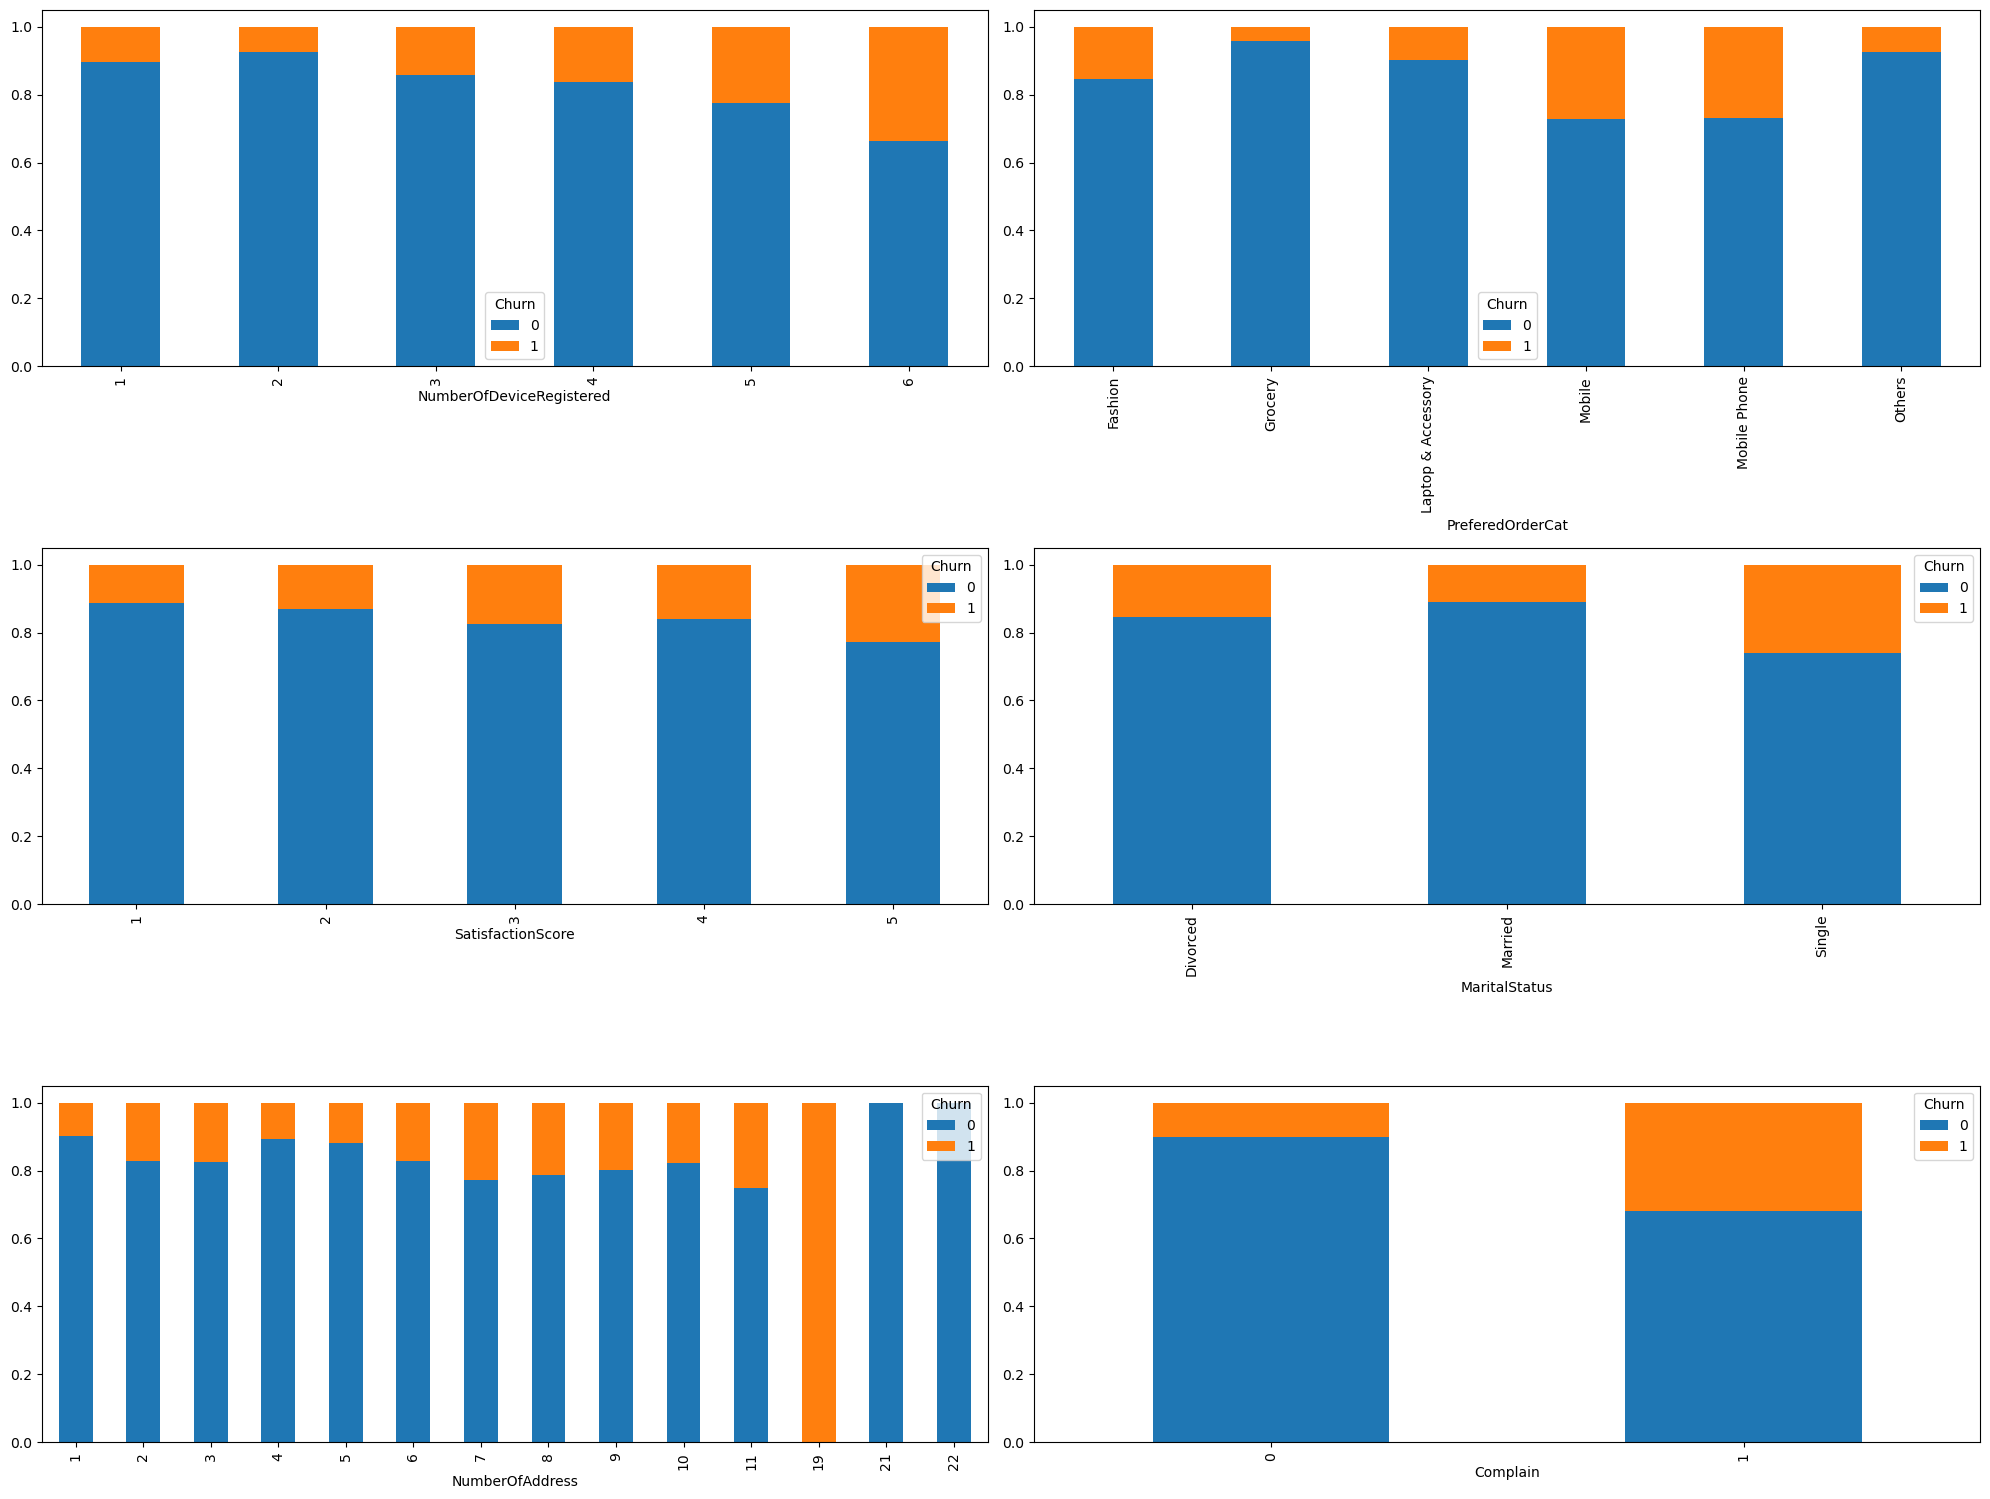

In [31]:
count = 0
fig = plt.figure(figsize=(20,20))

for i in list(df.drop(columns=['Tenure', 'WarehouseToHome', 'DaySinceLastOrder','CashbackAmount','Churn']).columns):
    count +=1
    ax= plt.subplot(4,2,count)
    pd.crosstab(df[i],df['Churn'],normalize=0).plot(kind='bar',stacked=True,ax=ax)
    fig.tight_layout()

plt.show()

In [32]:
# Mengubah fitur kategorikal menjadi numerik jika perlu
df_encoded = pd.get_dummies(df, columns=['PreferedOrderCat', 'MaritalStatus'], drop_first=True)

# Menghitung matriks korelasi
correlation_matrix = df_encoded.corr().abs()

# Mengambil korelasi antara setiap fitur dengan Churn
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Mengubah menjadi DataFrame untuk tampilan yang lebih baik
churn_correlation_df = churn_correlation.reset_index()
churn_correlation_df.columns = ['Feature', 'Correlation with Churn']

churn_correlation_df.sort_values('Correlation with Churn',ascending=False)

,Feature,Correlation with Churn
0,Churn,1.000000
1,Tenure,0.342089
2,Complain,0.262278
3,MaritalStatus_Single,0.172694
4,PreferedOrderCat_Mobile Phone,0.152569
5,CashbackAmount,0.151475
6,MaritalStatus_Married,0.151188
7,DaySinceLastOrder,0.142859
8,PreferedOrderCat_Laptop & Accessory,0.135448
9,PreferedOrderCat_Mobile,0.117303


In [33]:
df[df['NumberOfAddress']==19]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1581,5.46578,10.0,3,Mobile,2,Single,19,1,0.0,122.85,1


Dilihat dari grafik dan tabel diatas, maka dapat diambil beberapa poin berikut:
1. Dilihat dari ke 6 histogram fitur numerik yaitu **Tenure, WarehouseToHome, NumberOfDeviceRegistered, NumberOfAddress, DaySinceLastOrder dan CashbackAmount**, Tidak terlihat adanya pola berbeda yang signifikan antara customer yang churn dan tidak churn. Hal ini bisa dapat dilihat lebih lanjut pengaruhnya setelah modeling machine learning.
2. Dari fitur **PreferedOrderCat** (kategori pesanan yang paling sering dipesan oleh pelanggan dalam sebulan terakhir), terlihat bahwa proporsi paling banyak customer churn ada pada kategori Mobile dan Mobile Phone
3. Dari fitur **MaritalStatus**, terlihat bahwa proporsi customer churn lebih tinggi pada customer yang berstatus single.
4. Dari fitur **Complain**, terlihat bahwa proporsi customer churn lebih tinggi pada customer yang pernah mengajukan keluhan dalam sebulan terakhir
5. Dari fitur **SatisfactionScore**, terlihat bahwa proporsi customer churn lebih tinggi pada customer yang memberikan skor kepuasan pelanggan terhadap layanan paling tinggi yaitu 5
6. Dari fitur **NumberOfDeviceRegistered**, terlihat bahwa proporsi customer churn paling tinggi pada customer yang jumlah perangkat/devices terdaftar sebanyak 6. 
7. Dari fitur **NumberOfAddress**, terlihat bahwa proporsi customer churn paling tinggi pada customer dengan jumlah alamat 19 dimana jumlah nya hanya 1. Selain itu memiliki proporsi yang cukup sama untuk setiap jumlah alamat.
8. Dilihat dari hubungan korelasi antara fitur dan target(Churn), semua fitur mempunyai nilai korelasi yang rendah. Korelasi tertinggi ada pada fitur Tenure (lama waktu pelanggan berlangganan di perusahaan) yaitu 0.34.

### **Data Preparation & Feature Engineering**

Feature Engineering dapat memberikan input yang lebih baik untuk machine learning. Dalam Tahap ini ada beberapa hal yang dapat dilakukan:
- Scaling
- Encoding
- Missing Value
- Outlier
- Binning (dalam data ini Binning tidak dilakukan)
- Generating new features
- Feature Selection

Dikarenakan untuk outlier dan missing value sudah dibahas pada bagian sebelumnya, maka pada tahap ini dilanjutkan dengan scaling, encoding, generating new values dan feature selection.

In [34]:
# Data Unik pada setiap Kolom
list_item=[]
for col in df.columns:
    list_item.append([col, df[col].dtypes, df[col].nunique(),  df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2), df[col].unique()[0:5]])

tabel_col_unique = pd.DataFrame(data=list_item, columns=['Feature / Column Name','Data Type','Number of Unique','null','null Percentage','List Unique Sample'])
tabel_col_unique['Description']=desc
tabel_col_unique

,Feature / Column Name,Data Type,Number of Unique,null,null Percentage,List Unique Sample,Description
0,Tenure,float64,148,0,0.0,"[15.0, 7.0, 27.0, 20.0, 30.0]",Lama waktu pelanggan berlangganan di perusahaan.
1,WarehouseToHome,float64,33,0,0.0,"[29.0, 25.0, 13.0, 15.0, 16.0]",Jarak antara gudang ke rumah pelanggan.
2,NumberOfDeviceRegistered,int64,6,0,0.0,"[4, 3, 6, 2, 5]",Total jumlah perangkat/devices yang terdaftar pada pelanggan tertentu.
3,PreferedOrderCat,object,6,0,0.0,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone]",Kategori pesanan yang paling sering dipesan oleh pelanggan dalam sebulan terakhir.
4,SatisfactionScore,int64,5,0,0.0,"[3, 1, 4, 2, 5]",Skor kepuasan pelanggan terhadap layanan.
5,MaritalStatus,object,3,0,0.0,"[Single, Married, Divorced]",Status pernikahan pelanggan.
6,NumberOfAddress,int64,14,0,0.0,"[2, 5, 7, 8, 3]",Total jumlah alamat yang ditambahkan pada pelanggan tertentu.
7,Complain,int64,2,0,0.0,"[0, 1]",Keluhan yang diajukan dalam sebulan terakhir.
8,DaySinceLastOrder,float64,155,0,0.0,"[7.0, 5.966041671483429, 8.0, 11.0, 2.0]",Hari sejak pesanan terakhir oleh pelanggan.
9,CashbackAmount,float64,2335,0,0.0,"[143.32, 129.29, 168.54, 230.27, 322.17]",Rata-rata cashback dalam sebulan terakhir.


Dilihat kembali dari fitur yang harus disiapkan, berikut adalah fitur yang harus dilakukan preprocessing:
1. Scaling pada semua numerical feature yaitu:

    **Tenure, WarehouseToHome, 	NumberOfDeviceRegistered, DaySinceLastOrder, CashbackAmount, NumberOfAddress**. 
    
    Metode scalling yang akan dipakai adalah RobustScaler dikarenakan terdapat outlier dalam dataset.
2. Encoding pada feature text (**PreferedOrderCat** dan **MaritalStatus**). Kedua fitur bukan merupakan kategori ordinal. 

    Untuk **PreferedOrderCat**, terdapat 6 jumlah data unik, maka akan dilakukan onehot encoding untuk fitur ini. Untuk **MaritalStatus**, terdapat 3 jumlah data unik, maka akan dilakukan one hot encoding untuk fitur ini. (jumlah data unik pada kedua fitur masih tergolong sedikit)
3. Untuk fitur **SatisfactionScore**, data sudah dalam bentuk ordinal, maka tidak diperlukan preprocessing lebih lanjut
4. Untuk fitur **Complain**, data sudah dalam bentuk binary (0 dan 1), maka tidak diperlukan preprocessing lebih lanjut

Scaling dan encoding ini akan ditampung dalam column transformer

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

transformer = ColumnTransformer([
    ('scaling', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfAddress']),
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus','PreferedOrderCat'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaling', RobustScaler(),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'DaySinceLastOrder', 'CashbackAmount',
                                  'NumberOfAddress']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['MaritalStatus', 'PreferedOrderCat'])])

Persiapan data untuk training dan testing yang proporsinya yaitu 80% untuk training dan 20% untuk testing:

In [36]:
from sklearn.model_selection import train_test_split

# Penentuan fitur dan target
x=df.drop(columns='Churn')
y=df['Churn']

# Pembagian data training dan data testing (menggunakan stratify)
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

x_train.shape, x_test.shape

((2616, 10), (654, 10))

dilihat untuk persentase churn dan tidak churn pada dataset training dan test harus mirip:

In [37]:
display(y_train.value_counts(normalize=True), y_test.value_counts(normalize=True))

Churn
0    0.836774
1    0.163226
Name: proportion, dtype: float64

Churn
0    0.836391
1    0.163609
Name: proportion, dtype: float64

Testing untuk melihat gambaran data yang sudah dilakukan pre-processing: 

In [38]:
testing = pd.DataFrame(transformer.fit_transform(x_train),columns=transformer.get_feature_names_out())
testing.head()

,scaling__Tenure,scaling__WarehouseToHome,scaling__NumberOfDeviceRegistered,scaling__DaySinceLastOrder,scaling__CashbackAmount,scaling__NumberOfAddress,onehot__MaritalStatus_Married,onehot__MaritalStatus_Single,onehot__PreferedOrderCat_Grocery,onehot__PreferedOrderCat_Laptop & Accessory,onehot__PreferedOrderCat_Mobile,onehot__PreferedOrderCat_Mobile Phone,onehot__PreferedOrderCat_Others,remainder__SatisfactionScore,remainder__Complain
0,0.083333,0.0,1.0,-0.4,-0.233936,0.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.583333,0.9,0.0,-0.2,-0.211318,2.00,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0
2,1.250000,1.5,0.0,-0.2,2.331230,0.50,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0
3,-0.166667,-0.5,0.0,-0.2,-0.280854,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0
4,0.166667,0.0,0.0,-0.4,0.137670,0.25,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### Generating New Features & Feature Selection

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hanya pilih fitur numerik
numeric_features = x.drop(columns=['MaritalStatus','PreferedOrderCat']).select_dtypes(include=[np.number])

# Tangani missing values (optional, tergantung apakah kamu mau drop atau isi nilai NaN)
# Drop rows dengan NaN pada fitur numerik
numeric_features = numeric_features.dropna()

# Hitung VIF
vif = pd.DataFrame()
vif['feature'] = numeric_features.columns
vif['VIF'] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

# Lihat hasil VIF
vif

,feature,VIF
0,Tenure,3.200404
1,WarehouseToHome,4.006997
2,NumberOfDeviceRegistered,10.285913
3,SatisfactionScore,4.945287
4,NumberOfAddress,3.862170
5,Complain,1.385132
6,DaySinceLastOrder,3.075307
7,CashbackAmount,16.371528


Dikarenakan model yang akan digunakan adalah XGBoost dimana Multicollinearity tidak terlalu berpengaruh dan secara total hanya ada 9 fitur, maka semua fitur akan digunakan terlebih dahulu untuk pemodelan walaupun ada fitur yang memiliki nilai collinearity diatas 10. (lebih dari 4 mengartikan ada collinearity yang tinggi)

### **Modeling and Evaluation**

Untuk pemodelan, akan dilakukan percobaan pada beberapa model machine learning klasifikasi yang populer, yaitu:

1. **Logistic Regression**: Logistic Regression adalah model klasifikasi yang sederhana namun kuat, terutama untuk masalah klasifikasi biner. Model ini bekerja dengan mengestimasi probabilitas dari suatu kelas melalui fungsi logistik dan cocok untuk data yang linear atau hampir linear. Logistic Regression juga memberikan interpretasi yang jelas tentang pengaruh fitur melalui koefisien model.

2. **KNeighbors Classifier (KNN)**: KNN adalah metode klasifikasi non-parametrik yang bekerja berdasarkan kesamaan antara data. Pada dasarnya, model ini mengklasifikasikan sampel baru berdasarkan mayoritas label dari tetangga terdekatnya dalam ruang fitur. KNN sangat efektif untuk dataset dengan distribusi kelas yang terpisah dengan jelas, namun performanya bisa menurun pada data yang besar dan memiliki banyak fitur.

3. **Decision Tree Classifier**: Decision Tree adalah model berbasis pohon yang memecah data menjadi cabang-cabang berdasarkan kondisi tertentu pada fitur. Keputusan diambil di setiap node pohon, dan klasifikasi akhir dibuat pada daun pohon. Decision Tree mudah untuk diinterpretasi dan tidak memerlukan banyak pra-pemrosesan data, namun bisa rentan terhadap overfitting.

4. **Random Forest Classifier**: Random Forest adalah metode ensemble yang menggabungkan banyak Decision Tree. Setiap pohon dilatih pada subset yang berbeda dari data, dan keputusan akhir ditentukan melalui voting mayoritas. Random Forest meningkatkan stabilitas dan akurasi dibanding Decision Tree tunggal, serta mengurangi risiko overfitting.

5. **XGBoost Classifier**: XGBoost adalah algoritma boosting yang kuat yang menggunakan pohon keputusan secara bertahap, di mana pohon berikutnya mencoba memperbaiki kesalahan dari pohon sebelumnya. XGBoost dikenal karena performanya yang luar biasa dalam berbagai kompetisi machine learning dan efisiensinya dalam menangani dataset yang besar dan kompleks.

6. **LGBM Classifier (LightGBM)**: LGBM adalah algoritma boosting berbasis pohon yang dirancang untuk efisiensi dan kecepatan, terutama pada dataset besar dengan fitur yang banyak. LightGBM mengimplementasikan pendekatan leaf-wise untuk pemilihan split yang membuatnya lebih cepat dan lebih hemat memori dibanding XGBoost, namun juga membutuhkan penanganan yang hati-hati terhadap overfitting.

Hasil dari percobaan ini akan dinilai menggunakan metrik evaluasi seperti akurasi, precision, recall, dan F1-score. Model yang memberikan performa terbaik berdasarkan metrik evaluasi tersebut akan dipilih sebagai best model.

In [40]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models=[logreg,knn,dt,rf,xgb,lgbm]

Untuk pemilihan model, akan dilakukan cross validation pada model dengan deafult parameter terlebih dahulu.  Untuk metode cross-validation akan dipilih dengan metode **Stratified K-Fold** dikarenakan metode ini memastikan bahwa setiap fold dari data memiliki proporsi yang sama untuk kelas churn dan tidak churn. 

Dalam setiap fold, Stratified K-Fold menjaga distribusi 17% churn dan 83% non-churn, sehingga model dapat dilatih dan divalidasi pada set data yang lebih representatif dari keseluruhan populasi.

In [41]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

models = [logreg,knn,dt,rf,xgb,lgbm]
score_roc=[]
rata_roc=[]
std_roc=[]
score_f1=[]
rata_f1=[]
std_f1=[]
score_recall=[]
rata_recall=[]
std_recall=[]

for i in models:
    skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    model_cv_roc=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='roc_auc')
    model_cv_f1=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='f1')
    model_cv_recall=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')
    
    score_roc.append(model_cv_roc)
    rata_roc.append(model_cv_roc.mean())
    std_roc.append(model_cv_roc.std())

    score_f1.append(model_cv_f1)
    rata_f1.append(model_cv_f1.mean())
    std_f1.append(model_cv_f1.std())
    
    score_recall.append(model_cv_recall)
    rata_recall.append(model_cv_recall.mean())
    std_recall.append(model_cv_recall.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
              'mean ROC_AUC':rata_roc,
              'sdev ROC_AUC':std_roc,
              'mean F1 Score':rata_f1,
              'sdev F1 Score':std_f1,
              'mean Recall':rata_recall,
              'sdev Recall':std_recall,
              }).set_index('model').sort_values(by=['mean F1 Score','mean Recall'],ascending=False)

[LightGBM] [Info] Number of positive: 384, number of negative: 1970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 454
[LightGBM] [Info] Number of data points in the train set: 2354, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.163127 -> initscore=-1.635146
[LightGBM] [Info] Start training from score -1.635146
[LightGBM] [Info] Number of positive: 384, number of negative: 1970
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 2354, number of used features: 15
[LightGBM] [Info] [binary:Bo

,mean ROC_AUC,sdev ROC_AUC,mean F1 Score,sdev F1 Score,mean Recall,sdev Recall
model,,,,,,
XGBoost,0.935890,0.024723,0.753877,0.057499,0.704540,0.085735
LightGBM,0.937372,0.024514,0.705548,0.063449,0.652713,0.091233
Random Forest,0.937770,0.024323,0.678750,0.053327,0.575748,0.058415
Decision Tree,0.770655,0.043414,0.622916,0.064328,0.625138,0.082193
Logistic Regression,0.881355,0.021669,0.579625,0.069141,0.486822,0.072235
KNN,0.856483,0.029957,0.472488,0.065323,0.348560,0.058227


Terlihat dari keseluruhan nilai evaluasi metriks pada data training, model **XGBoost** mempunyai nilai paling tinggi.

In [42]:
from sklearn.metrics import classification_report,roc_auc_score

score_roc_auc = []
recalls = []
f1_scores = []

def y_pred_func(model):
    estimator = Pipeline([
        ('preprocess', transformer),
        ('model', model)
    ])
    
    # Fit model
    estimator.fit(x_train, y_train)
    return estimator, estimator.predict(x_test)

for model, model_name in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']):
    estimator, y_pred = y_pred_func(model)
    y_predict_proba = estimator.predict_proba(x_test)[:, 1]
    
    # Hitung skor ROC AUC
    score_roc_auc.append(roc_auc_score(y_test, y_predict_proba))
    
    # Dapatkan classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Ambil nilai recall dan f1 score
    recalls.append(report['1']['recall'])  # recall untuk kelas positif (churn)
    f1_scores.append(report['1']['f1-score'])  # F1 score untuk kelas positif (churn)
    
    print(model_name, '\n', classification_report(y_test, y_pred))

# Membuat DataFrame untuk menampilkan hasil
results_df = pd.DataFrame({
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'roc_auc score': score_roc_auc,
    'recall': recalls,
    'f1 score': f1_scores
}).set_index('model').sort_values(by='roc_auc score', ascending=False)

results_df

Logistic Regression 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       547
           1       0.69      0.55      0.61       107

    accuracy                           0.89       654
   macro avg       0.80      0.75      0.77       654
weighted avg       0.88      0.89      0.88       654

KNN 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       547
           1       0.70      0.46      0.55       107

    accuracy                           0.88       654
   macro avg       0.80      0.71      0.74       654
weighted avg       0.87      0.88      0.87       654

Decision Tree 
               precision    recall  f1-score   support

           0       0.93      0.90      0.92       547
           1       0.58      0.67      0.62       107

    accuracy                           0.87       654
   macro avg       0.75      0.79      0.77       654
weighted avg       0.88      0

,roc_auc score,recall,f1 score
model,,,
XGBoost,0.947718,0.644860,0.686567
LightGBM,0.946556,0.644860,0.673171
Random Forest,0.938535,0.607477,0.673575
Logistic Regression,0.900494,0.551402,0.611399
KNN,0.845991,0.457944,0.553672
Decision Tree,0.788003,0.672897,0.620690


Terlihat bahwa pada data test, model XGBoost juga mempunyai nilai tertinggi untuk metrik ROC_AUC, F1 Score dan Recall. Maka selanjutnya akan dilanjutkan memakai model XGBoost dan dilakukan oversampling

### **Imbalance Data**

In [43]:
y.value_counts()

Churn
0    2736
1    534 
Name: count, dtype: int64

Dikarenakan dataset imbalance, yaitu pada target (y) hanya terdapat data churn (1) sebesar 17% dan tidak churn (0) sebesar 83%. Untuk dapat menangani data yang imbalance, tidak dianjurkan menggunakan teknik Undersampling tidak akan dilakukan karena dataset yang dimiliki hanya sedikit yaitu 514 baris untuk customer churn dan akan menyebabkan hilangnya banyak data pada customer tidak churn. 

Maka akan dilakukan teknik Oversampling dikarenakan:
1. Menyediakan lebih banyak data untuk kelas minoritas, model dapat beradaptasi lebih baik dan menghasilkan prediksi yang lebih akurat untuk kedua kelas.
2. Untuk model yang ditujukan untuk mendeteksi churn, recall adalah metrik yang penting. Oversampling membantu meningkatkan recall dengan memberikan lebih banyak contoh positif untuk model belajar.

Oversampling akan dilakukan dengan metode **RandomOverSampler** dimana metode ini akan secara sederhana membuat salinan data dari kelas minoritas secara acak untuk meningkatkan jumlah contoh kelas minoritas hingga seimbang dengan kelas mayoritas.

Untuk metode SMOTE tidak dilakukan pada dataset. Walaupun bisa mengurangi kemungkinan overfitting dan menambah variasi pada kelas minoritas dengan data yang lebih beragam. Namun, metode ini lebih efektif untuk dataset yang besar dan dapat menghasilkan data sintetis yang tidak realistis jika salah satu contoh kelas minoritas yang digunakan adalah outlier. Selain itu, metode ini sulit diterapkan untuk fitur kategorikal dimana dataset terdapat beberapa fitur kategorikal

Oversampling hanya akan dilakukan pada data training.

In [44]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

In [45]:
data = x_train
target = y_train

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

transformer = ColumnTransformer([
    ('scaling', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfAddress']),
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus','PreferedOrderCat'])
], remainder='passthrough')

# Untuk menyimpan hasil evaluasi
results_ros = []
results_no_oversampling = []

# Loop melalui setiap fold
for train_index, test_index in skf.split(data, target):
    x_train_fold, x_test_fold = data.iloc[train_index], data.iloc[test_index]
    y_train_fold, y_test_fold = target.iloc[train_index], target.iloc[test_index]

    # Model XGBoost tanpa oversampling
    xgb_no_oversampling = XGBClassifier()
    estimator_no_oversampling = Pipeline([
        ('preprocess', transformer),
        ('model', xgb_no_oversampling)
    ])
    estimator_no_oversampling.fit(x_train_fold, y_train_fold)

    # Evaluasi untuk data pelatihan
    y_pred_no_oversampling_train = estimator_no_oversampling.predict(x_train_fold)
    y_predict_proba_no_oversampling_train = estimator_no_oversampling.predict_proba(x_train_fold)[:, 1]

    # Simpan hasil untuk model tanpa oversampling di data pelatihan
    results_no_oversampling.append({
        'roc_auc_train': roc_auc_score(y_train_fold, y_predict_proba_no_oversampling_train),
        'accuracy_train': accuracy_score(y_train_fold, y_pred_no_oversampling_train),
        'precision_train': precision_score(y_train_fold, y_pred_no_oversampling_train),
        'recall_train': recall_score(y_train_fold, y_pred_no_oversampling_train),
        'f1_train': f1_score(y_train_fold, y_pred_no_oversampling_train),
    })

    # Evaluasi untuk data pengujian
    y_pred_no_oversampling_test = estimator_no_oversampling.predict(x_test_fold)
    y_predict_proba_no_oversampling_test = estimator_no_oversampling.predict_proba(x_test_fold)[:, 1]

    # Simpan hasil untuk model tanpa oversampling di data pengujian
    results_no_oversampling[-1].update({
        'roc_auc_test': roc_auc_score(y_test_fold, y_predict_proba_no_oversampling_test),
        'accuracy_test': accuracy_score(y_test_fold, y_pred_no_oversampling_test),
        'precision_test': precision_score(y_test_fold, y_pred_no_oversampling_test),
        'recall_test': recall_score(y_test_fold, y_pred_no_oversampling_test),
        'f1_test': f1_score(y_test_fold, y_pred_no_oversampling_test),
    })

    # Random Oversampling
    random_over_sampler = RandomOverSampler(random_state=0)
    x_train_ros, y_train_ros = random_over_sampler.fit_resample(x_train_fold, y_train_fold)

    # Model XGBoost dengan Random Oversampling
    xgb_ros = XGBClassifier()
    estimator_ros = Pipeline([
        ('preprocess', transformer),
        ('model', xgb_ros)
    ])
    estimator_ros.fit(x_train_ros, y_train_ros)

    # Evaluasi untuk data pelatihan
    y_pred_ros_train = estimator_ros.predict(x_train_ros)
    y_predict_proba_ros_train = estimator_ros.predict_proba(x_train_ros)[:, 1]

    # Simpan hasil untuk model dengan Random Oversampling di data pelatihan
    results_ros.append({
        'roc_auc_train': roc_auc_score(y_train_ros, y_predict_proba_ros_train),
        'accuracy_train': accuracy_score(y_train_ros, y_pred_ros_train),
        'precision_train': precision_score(y_train_ros, y_pred_ros_train),
        'recall_train': recall_score(y_train_ros, y_pred_ros_train),
        'f1_train': f1_score(y_train_ros, y_pred_ros_train),
    })

    # Evaluasi untuk data pengujian
    y_pred_ros_test = estimator_ros.predict(x_test_fold)
    y_predict_proba_ros_test = estimator_ros.predict_proba(x_test_fold)[:, 1]

    # Simpan hasil untuk model dengan Random Oversampling di data pengujian
    results_ros[-1].update({
        'roc_auc_test': roc_auc_score(y_test_fold, y_predict_proba_ros_test),
        'accuracy_test': accuracy_score(y_test_fold, y_pred_ros_test),
        'precision_test': precision_score(y_test_fold, y_pred_ros_test),
        'recall_test': recall_score(y_test_fold, y_pred_ros_test),
        'f1_test': f1_score(y_test_fold, y_pred_ros_test),
    })

# Menghitung rata-rata untuk setiap metrik
avg_metrics_no_oversampling = pd.DataFrame(results_no_oversampling).mean().to_dict()
avg_metrics_ros = pd.DataFrame(results_ros).mean().to_dict()

# Membuat DataFrame untuk hasil metrik
metrics_df = pd.DataFrame({
    'Metrics': ['roc_auc', 'accuracy', 'precision', 'recall', 'f1'],
    'No Oversampling Train': [avg_metrics_no_oversampling['roc_auc_train'], avg_metrics_no_oversampling['accuracy_train'], avg_metrics_no_oversampling['precision_train'], avg_metrics_no_oversampling['recall_train'], avg_metrics_no_oversampling['f1_train']],
    'No Oversampling Test': [avg_metrics_no_oversampling['roc_auc_test'], avg_metrics_no_oversampling['accuracy_test'], avg_metrics_no_oversampling['precision_test'], avg_metrics_no_oversampling['recall_test'], avg_metrics_no_oversampling['f1_test']],
    'Random Oversampling Train': [avg_metrics_ros['roc_auc_train'], avg_metrics_ros['accuracy_train'], avg_metrics_ros['precision_train'], avg_metrics_ros['recall_train'], avg_metrics_ros['f1_train']],
    'Random Oversampling Test': [avg_metrics_ros['roc_auc_test'], avg_metrics_ros['accuracy_test'], avg_metrics_ros['precision_test'], avg_metrics_ros['recall_test'], avg_metrics_ros['f1_test']]
})

# Set index dan tampilkan DataFrame
metrics_df.set_index('Metrics', inplace=True)
metrics_df

,No Oversampling Train,No Oversampling Test,Random Oversampling Train,Random Oversampling Test
Metrics,,,,
roc_auc,1.0,0.935890,1.000000,0.933575
accuracy,1.0,0.925839,0.999822,0.924691
precision,1.0,0.818773,0.999645,0.763923
recall,1.0,0.704540,1.000000,0.781783
f1,1.0,0.753877,0.999822,0.770752


Meskipun terjadi penurunan nilai precision sebelum dan setelah oversampling, hasil evaluasi menunjukkan bahwa recall meningkat dengan penerapan oversampling dibandingkan dengan model tanpa oversampling. 

Dalam konteks ini, diasumsikan bahwa margin profit dari produk dan Customer Lifetime Value (CLV) lebih tinggi dibandingkan dengan biaya promosi yang akan dilakukan. Oleh karena itu, metrik evaluasi yang lebih dipertimbangkan adalah recall. Dengan memaksimalkan recall, perusahaan dapat menangkap sebanyak mungkin pelanggan yang berpotensi churn, meskipun akan ada beberapa pelanggan yang tidak benar-benar churn namun tetap menerima promo (False Positives). Prioritas pada recall ini diambil karena nilai CLV yang tinggi dianggap lebih besar daripada biaya promosi yang dikeluarkan untuk mencegah churn.

Oleh karena itu, pemilihan model selanjutnya akan difokuskan pada penggunaan oversampling, yang menunjukkan hasil recall yang lebih tinggi. Setelah itu, akan dilakukan hyperparameter tuning untuk meningkatkan kinerja model 

Terlihat juga dari data masih terjadi overfit, dimana hasil nilai train jauh lebih tinggi daripada nilai test. Hal ini akan ditangani selanjutnya pada tahap hyperparameter tuning


### **Hyperparameter Tuning**

Model machine learning akan dilanjutkan hyperparameter tuning dengan XGBoost

In [46]:
from imblearn.pipeline import Pipeline

# Pembagian data training dan data testing (menggunakan stratify)
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=0)

xgb = XGBClassifier()
ros = RandomOverSampler(random_state=0)

transformer = ColumnTransformer([
    ('scaling', RobustScaler(), ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'DaySinceLastOrder', 'CashbackAmount', 'NumberOfAddress']),
    ('onehot', OneHotEncoder(drop='first'), ['MaritalStatus','PreferedOrderCat'])
], remainder='passthrough')

estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',xgb)
])


**Model Parameters**:
1. n_estimators

    -   Deskripsi: Jumlah pohon keputusan yang akan dibangun.
    -   Default: 100
    -   Catatan: Lebih banyak pohon biasanya meningkatkan kinerja tetapi juga dapat menyebabkan overfitting.

2. max_depth

    - Deskripsi: Kedalaman maksimum setiap pohon. Mengontrol kompleksitas model; kedalaman yang lebih besar dapat mengarah pada overfitting.
    - Default: 6
    - Catatan: Semakin tinggi nilai ini, semakin kompleks modelnya.

3. subsample

    - Deskripsi: Fraksi dari sampel yang digunakan untuk membangun setiap pohon.
    - Default: 1 (menggunakan semua data)
    - Catatan: Mengurangi nilai ini dapat mencegah overfitting.

4. colsample_bytree

    - Deskripsi: Fraksi dari fitur yang akan digunakan saat membangun setiap pohon.
    - Default: 1 (menggunakan semua fitur)
    - Catatan: Ini juga dapat membantu mengurangi overfitting.

5. gamma

    - Deskripsi: Minimum loss reduction yang diperlukan untuk melakukan pembelahan. Menentukan seberapa konservatif algoritma saat membagi pohon.
    - Default: 0
    - Catatan: Nilai lebih tinggi berarti lebih konservatif dalam melakukan pembelahan.

6. reg_alpha

    - Deskripsi: Parameter regularisasi L1. Ini dapat membantu mengurangi overfitting dengan menambah penalti pada bobot model.
    - Default: 0
    - Catatan: Penambahan nilai ini dapat membantu dalam mengurangi kompleksitas model.

7. reg_lambda

    - Deskripsi: Parameter regularisasi L2. Sama dengan reg_alpha, ini juga membantu mengurangi overfitting dengan penalti pada bobot model.
    - Default: 1
    - Catatan: Pengaturan nilai ini dapat membantu menyeimbangkan antara bias dan varians.

8. max_leaves

    - Deskripsi: Jumlah maksimum daun (leaves) dalam setiap pohon. Parameter ini mengontrol kompleksitas model dengan membatasi jumlah terminal nodes yang dapat dibentuk dalam pohon keputusan. Menggunakan lebih banyak leaves memungkinkan model untuk menangkap pola yang lebih kompleks, tetapi dapat meningkatkan risiko overfitting.
    - Default: 0 (tidak ada batasan pada jumlah leaves).
    - Catatan: Semakin tinggi nilai max_leaves, semakin kompleks modelnya. Namun, jika nilai ini terlalu tinggi dibandingkan dengan jumlah data pelatihan, model dapat menjadi terlalu spesifik pada data tersebut, sehingga mengurangi kemampuannya untuk generalisasi pada data yang tidak terlihat.

Selain ini masih ada parameter lainnya, tetapi untuk kasus ini, 8 parameter ini yang akan dilakukan hyperparameter tuning:

In [47]:
param_grid = {
    'model__max_depth': list(range(2,5,1)),                 # Kedalaman maksimum dari pohon
    'model__max_leaves': list(range(10,40,10)),             # Jumlah maksimum daun (leaves) dalam setiap pohon
    'model__n_estimators': list(range(40,80)),              # Jumlah pohon yang akan dibangun
    'model__subsample': [0.4, 0.6, 0.8, 1.0],               # Proporsi sampel yang akan diambil untuk membangun setiap pohon
    'model__colsample_bytree': [0.4, 0.6, 0.8, 1.0],        # Proporsi fitur yang akan diambil untuk membangun setiap pohon
    'model__gamma': [2,3,4,5],                              # Minimum loss reduction yang diperlukan untuk membuat cabang baru dalam pohon
    'model__reg_alpha': [2,3,4,5,6,7,8,9,10],               # Regularisasi L1
    'model__reg_lambda': [2,3,4,5,6,7,8,9,10],              # Regularisasi L2
    'model__random_state': [0]
}

In [48]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
grid = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_grid,
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=1000,
    cv=10,
    random_state=0)

grid.fit(x_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9278740884060612
{'model__subsample': 0.8, 'model__reg_lambda': 2, 'model__reg_alpha': 4, 'model__random_state': 0, 'model__n_estimators': 40, 'model__max_leaves': 20, 'model__max_depth': 4, 'model__gamma': 2, 'model__colsample_bytree': 1.0}


Hasil parameter terbaik untuk model XGBoost:

1. subsample: 0.8
2. reg_lambda: 2
3. reg_alpha: 4
4. n_estimators: 40
5. max_leaves: 20
6. max_depth: 4
7. gamma: 2
8. colsample_bytree: 1.0

In [49]:
best_model = grid.best_estimator_
best_model.fit(x_train, y_train)

Pipeline(steps=[('oversampling', RandomOverSampler(random_state=0)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount',
                                                   'NumberOfAddress']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'PreferedOrderCat'])...
                               feature_types=None, gamma=2, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=4, max_leaves=20,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [50]:
estimator=Pipeline([
    ('oversampling',ros),
    ('preprocess',transformer),
    ('model',xgb)
])
estimator.fit(x_train, y_train)

y_pred_default = estimator.predict(x_test)
y_pred_proba_default = estimator.predict_proba(x_test)
y_pred_tuned = best_model.predict(x_test)
y_pred_proba_tuned = best_model.predict_proba(x_test)

roc_auc_default = roc_auc_score(y_test, y_pred_proba_default[:,1])
roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned[:,1])

print('ROC AUC Score Default LGBM : ', roc_auc_default)
print('ROC AUC Score Tuned LGBM : ', roc_auc_tuned)

ROC AUC Score Default LGBM :  0.9462830391771601
ROC AUC Score Tuned LGBM :  0.9303593090604657


Terlihat bahwa model XGBoost setelah kita dilakuan hyperparameter tuning memiliki nilai ROC AUC yang sedikit lebih rendah. Hal ini dapat diakibatkan karena hyperparameter tuning juga melakukan generalization agar model tidak overfitting dimana sangat mungkin nilai roc menjadi lebih rendah.

Kemudian dari Classification Report:

In [51]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       547
           1       0.71      0.72      0.71       107

    accuracy                           0.91       654
   macro avg       0.83      0.83      0.83       654
weighted avg       0.91      0.91      0.91       654

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       547
           1       0.58      0.85      0.69       107

    accuracy                           0.87       654
   macro avg       0.77      0.86      0.80       654
weighted avg       0.90      0.87      0.88       654



Terlihat bahwa model XGBoost yang telah melalui proses hyperparameter tuning menunjukkan hasil yang lebih baik, terutama pada metrik recall, meskipun ada sedikit pengurangan pada metrik accuracy dan precision. 

Pengecekan Overfitting:

In [52]:
from sklearn.metrics import confusion_matrix

# Pipeline model dengan XGBoost dan oversampling (oversampling diterapkan setelah preprocess)
model = best_model

# Evaluasi di data training
y_pred_train = model.predict(x_train)
train_roc = roc_auc_score(y_train, y_pred_train)
print("Training ROC-AUC Score:", train_roc)

# Evaluasi di data testing
y_pred_test = model.predict(x_test)
test_roc = roc_auc_score(y_test, y_pred_test)
print("Testing ROC-AUC Score:", test_roc)

# Classification report untuk data training
print("\nClassification Report on Training Data:")
print(classification_report(y_train, model.predict(x_train)))

# Classification report untuk data testing
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_pred_test))

# Hitung confusion matrix untuk analisis lebih lanjut
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print("\nConfusion Matrix - Data Pelatihan:\n", cm_train)
print("Confusion Matrix - Data Pengujian:\n", cm_test)


Training ROC-AUC Score: 0.9121913591804028
Testing ROC-AUC Score: 0.8639905004356814

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2189
           1       0.66      0.92      0.77       427

    accuracy                           0.91      2616
   macro avg       0.82      0.91      0.85      2616
weighted avg       0.93      0.91      0.91      2616


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       547
           1       0.58      0.85      0.69       107

    accuracy                           0.87       654
   macro avg       0.77      0.86      0.80       654
weighted avg       0.90      0.87      0.88       654


Confusion Matrix - Data Pelatihan:
 [[1984  205]
 [  35  392]]
Confusion Matrix - Data Pengujian:
 [[480  67]
 [ 16  91]]


Pada hasil sebelum dilakukan hyperparameter tuning, dapat dilihat model masih overfitting karena nilai evaluasi pada data training jauh lebih tinggi dari nilai evaluasi data testing. Hal ini disebabkan model masih terlalu kompleks. Model terbaru dengan hyperparameter tuning (Training ROC-AUC: 0.912, Testing ROC-AUC: 0.864) lebih baik dari perspektif generalizability dan menghindari overfitting, karena perbedaan antara training dan testing score lebih kecil.

Meskipun testing ROC-AUC Score sedikit lebih rendah, memilih model ini lebih baik karena mampu menggeneralisasi lebih baik ke data baru, yang merupakan tujuan utama. Oleh karena itu, model XGBoost yang telah dituning ini akan digunakan sebagai model akhir.

### **Best Model**

### Feature Importance

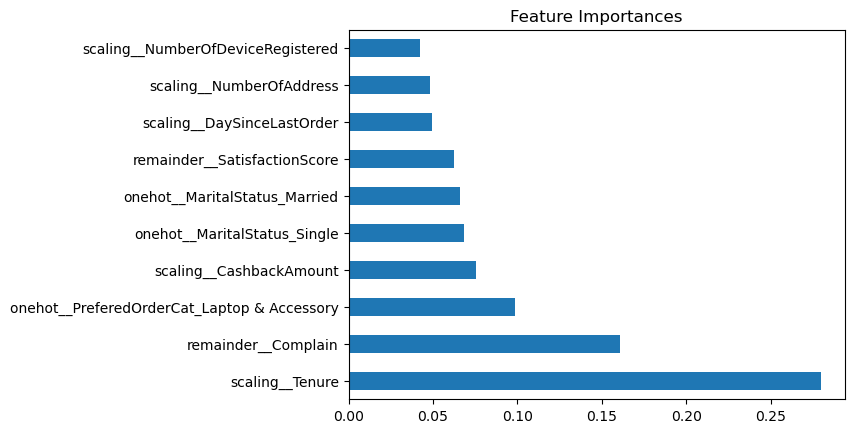

In [53]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat pada hasil best model dan dari barplot Feature Importance, fitur yang paling penting adalah fitur/kolom **Tenure** dan **Complain**. Sedangkan untuk fitur lainnya jauh lebih kecil nilainya

In [54]:
best_model.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('oversampling', RandomOverSampler(random_state=0)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', RobustScaler(),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount',
                                                   'NumberOfAddress']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['MaritalStatus',
                                                   'PreferedOrderCat'])...
                               feature_types=None, gamma=2, grow_policy=

### Limitasi Model:

Model hanya dapat memprediksi berdasarkan fitur yang ada. Untuk fitur dengan data kategori maka hanya bisa memprediksi dalam jumlah unik katergori tsb, dan untuk numerik hanya dapat memprediksi dalam batasan min-max dari fitur tersebut.

In [55]:
# Data Unik pada setiap Kolom
list_item=[]
for col in df.drop(columns=['Churn']).columns:
    list_item.append([col, df[col].dtypes, df[col].nunique(),  df[col].min(), df[col].max(), df[col].unique()[0:6]])

tabel_col_unique = pd.DataFrame(data=list_item, columns=['Feature / Column Name','Data Type','Number of Unique','Min','Max','List Unique Sample'])
tabel_col_unique['Description']=desc[0:10]
tabel_col_unique

,Feature / Column Name,Data Type,Number of Unique,Min,Max,List Unique Sample,Description
0,Tenure,float64,148,0.0,61.0,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0]",Lama waktu pelanggan berlangganan di perusahaan.
1,WarehouseToHome,float64,33,5.0,127.0,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0]",Jarak antara gudang ke rumah pelanggan.
2,NumberOfDeviceRegistered,int64,6,1,6,"[4, 3, 6, 2, 5, 1]",Total jumlah perangkat/devices yang terdaftar pada pelanggan tertentu.
3,PreferedOrderCat,object,6,Fashion,Others,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]",Kategori pesanan yang paling sering dipesan oleh pelanggan dalam sebulan terakhir.
4,SatisfactionScore,int64,5,1,5,"[3, 1, 4, 2, 5]",Skor kepuasan pelanggan terhadap layanan.
5,MaritalStatus,object,3,Divorced,Single,"[Single, Married, Divorced]",Status pernikahan pelanggan.
6,NumberOfAddress,int64,14,1,22,"[2, 5, 7, 8, 3, 1]",Total jumlah alamat yang ditambahkan pada pelanggan tertentu.
7,Complain,int64,2,0,1,"[0, 1]",Keluhan yang diajukan dalam sebulan terakhir.
8,DaySinceLastOrder,float64,155,0.0,46.0,"[7.0, 5.966041671483429, 8.0, 11.0, 2.0, 1.0]",Hari sejak pesanan terakhir oleh pelanggan.
9,CashbackAmount,float64,2335,0.0,324.99,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81]",Rata-rata cashback dalam sebulan terakhir.


Selain itu, meskipun XGBoost menghasilkan model yang akurat, interpretasi dari hasilnya bisa sulit. Struktur pohon keputusan yang kompleks membuatnya kurang transparan dibandingkan dengan model yang lebih sederhana seperti regresi logistik.

### **Conclusion & Recommendation**

### Conclusion

In [56]:
print('Classification Report Tuned LGBM : \n', report_tuned)
print("Confusion Matrix - Data Pengujian:\n", cm_test)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       547
           1       0.58      0.85      0.69       107

    accuracy                           0.87       654
   macro avg       0.77      0.86      0.80       654
weighted avg       0.90      0.87      0.88       654

Confusion Matrix - Data Pengujian:
 [[480  67]
 [ 16  91]]


Berdasarkan hasil classification report dari model churn yang telah dibangun, kita dapat menyimpulkan bahwa jika perusahaan menggunakan model ini untuk menyaring customer yang berpotensi churn dan menawarkan promosi kepada mereka, perusahaan dapat memaksimalkan retensi customer yang bernilai tinggi meskipun akan ada beberapa over-spending pada promosi.

Dalam konteks e-commerce dengan Customer Lifetime Value (CLV) yang tinggi (seperti pada produk elektronik, luxury retail, dll.), nilai CLV dari customer jauh lebih tinggi daripada biaya promosi. Oleh karena itu, Recall menjadi metrik yang lebih penting, karena perusahaan ingin menangkap sebanyak mungkin customer yang berpotensi churn, meskipun beberapa dari mereka sebenarnya tidak akan churn tetapi tetap menerima promosi.

Analisis Berdasarkan Recall:
Dari perspektif recall, **model ini mampu mengidentifikasi 85% customer yang berpotensi churn**, yang berarti dari seluruh customer yang benar-benar akan churn, kita mampu menangkap 85% dari mereka. Misalkan, jika dilihat dari data diatas dimana True Positive adalah 91, False Positive adalah 67 dan False Negative adalah 16. Maka dapat disimulasikan perhitungan berikut:

Simulasi Penghematan Biaya Promosi dengan dan Tanpa Model:

Untuk menghitung manfaat menggunakan model ini, kita buat asumsi bahwa:
1. Biaya promosi per customer adalah 40 USD.
2. Customer Lifetime Value (CLV) per customer adalah 500 USD.

**Tanpa Model (Semua customer ditawarkan promosi):**
1. Total Biaya Promosi: (480 + 67 + 16 + 91) x 40 USD = 26,160 USD.
2. Total Customer yang Berhasil Diselamatkan (churn tertarik): (91 + 16) = 107 customer (karena semua ditawarkan promosi).
3. Customer yang Tetap Churn: 0 customer (karena semua ditawarkan promosi).
4. Total Nilai CLV Customer yang Diselamatkan: 107 x 500 USD = 53,500 USD.
5. Biaya Promosi yang Terbuang (ke customer yang tidak churn): (480 + 67) x 40 USD = 21,880 USD.
6. Selisih CLV dengan biaya promosi: 27,340 USD 

**Dengan Model (Hanya customer yang diprediksi akan churn yang ditawarkan promosi):**
1. Total Biaya Promosi: (91 + 67) x 40 USD = 6,320 USD.
2. Total Customer yang Berhasil Diselamatkan (churn tertarik): 91 customer (berdasarkan recall 85%).
3. Customer yang Tetap Churn: 16 customer (karena 15% dari customer berisiko tidak tertangkap).
4. Total Nilai CLV Customer yang Diselamatkan: 91 x 500 USD = 45,500 USD.
5. Biaya yang Terbuang (ke customer yang tidak churn namun menerima promosi): 67 x 40 USD = 2,680 USD.
6. Selisih CLV dengan biaya promosi: 39,180 USD 

Dengan menggunakan model churn ini, perusahaan dapat menghemat 19,840 USD dalam biaya promosi dan tetap menyelamatkan 85% customer berisiko churn. Meskipun ada beberapa customer yang tidak akan churn tetapi tetap menerima promosi, nilai CLV dari customer yang berhasil dicegah churn jauh lebih berharga dibandingkan biaya promosi yang dikeluarkan.

Dilihat dari perbandingan antara nilai CLV dan biaya promosi, meskipun tanpa model semua customer churn dapat diselamatkan, namun secara nilai, model churn lebih efisien, meskipun hanya menyelamatkan 85% customer berisiko churn.

Dalam kasus churn yang imbalance (hanya 17%), menggunakan model ini lebih efisien daripada menawarkan promosi ke semua customer. Namun, jika persentase churn lebih tinggi (misalnya >50%), pendekatan yang lebih luas atau strategi retensi yang lebih menyeluruh mungkin diperlukan, karena hampir semua customer akan berisiko churn, sehingga prediksi individu mungkin tidak lagi menjadi solusi yang paling efektif.

Dalam kasus ini, biaya promosi yang terbuang menjadi kurang signifikan dibandingkan keuntungan besar dari retensi customer bernilai tinggi. Meskipun ada beberapa false positives, model ini tetap memberikan keuntungan finansial yang substansial bagi perusahaan dengan CLV tinggi, sehingga Recall tetap menjadi metrik yang diprioritaskan.

### Recommendation

Hal - hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi adalah sebagai berikut:

1. **Pengujian A/B (A/B Testing)**: Jika memungkinkan, melakukan pengujian A/B untuk menguji efektivitas strategi pencegahan churn yang diterapkan berdasarkan prediksi model.

2. **Fitur Tambahan**: Menambahkan fitur baru yang mungkin berhubungan dengan churn, seperti:
    - Frekuensi Pembelian: Menghitung rata-rata waktu antara setiap pembelian untuk melihat pola perilaku belanja.
    - Kategori Produk yang Dibeli: Menyimpan informasi tentang kategori produk yang paling sering dibeli oleh pelanggan.
    - Program Loyalitas: Menambahkan kolom yang menunjukkan apakah pelanggan terdaftar dalam program loyalitas dan seberapa sering mereka memanfaatkannya.
    - Sumber Referral: Mencatat bagaimana pelanggan mengetahui tentang perusahaan bisa memberikan insight tentang pengaruh pemasaran.
    - Penggunaan Aplikasi: Jika ada data tentang seberapa sering pelanggan menggunakan aplikasi, ini bisa menjadi indikator keterlibatan yang tinggi.

3. **Segmentasi Pelanggan**: Membagi pelanggan ke dalam segmen berdasarkan pola perilaku atau karakteristik demografis untuk menentukan fitur mana yang paling mempengaruhi churn di masing-masing segmen.

4. **Analisis Kesalahan**: Melakukan analisis mendalam terhadap data yang salah diprediksi oleh model untuk memahami karakteristik pelanggan tersebut. Ini bisa membantu dalam mengidentifikasi pola yang tidak terdeteksi sebelumnya. Mencoba pemodelan lain selain XGBoost serta melakukan hyperparameter tuning lebih dalam atau oversampling dengan cara yang berbeda. Selain itu, lebih memperhatikan dan mengambil data untuk customer churn agar mengurangi ketidakseimbangan data

5. **Monitoring Kinerja Model**: Secara berkala mengevaluasi model dengan data baru untuk memastikan model tetap relevan dan akurat seiring waktu. 

### **Save Model**

In [57]:
# Save model
import pickle

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=0)

estimator = best_model
estimator.fit(x_train, y_train)

pickle.dump(estimator, open('Model_Churn_CAPSTONE3_AdelineWong.sav', 'wb'))

In [58]:
# Load model
filename = 'Model_Churn_CAPSTONE3_AdelineWong.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [59]:
predictions = loaded_model.predict(x_test)
predictions[predictions>0].sum()

158

In [63]:
y_pred_ = loaded_model.predict(x_test)
print(classification_report(y_test, y_pred_))
print(confusion_matrix(y_test,y_pred_))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       547
           1       0.58      0.85      0.69       107

    accuracy                           0.87       654
   macro avg       0.77      0.86      0.80       654
weighted avg       0.90      0.87      0.88       654

[[480  67]
 [ 16  91]]
